# Подготовка данных

In [100]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [101]:
# df = pd.read_csv(r"InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

/var/folders/2x/tx689lxn54ngmttr2b89rvg00000gn/T/ipykernel_33463/3738330455.py:2: DtypeWarning: Columns (264) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')


In [102]:
len(df.columns)

283

In [103]:
# import pandas as pd
# import os

# # Create logs directory if it doesn't exist
# os.makedirs('logs', exist_ok=True)

# # Load the dataframes
# df1 = pd.read_csv("InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
# df2 = pd.read_csv("InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

# # Get columns for each dataframe
# cols_df1 = set(df1.columns)
# cols_df2 = set(df2.columns)

# # Find the differences
# cols_only_in_df1 = cols_df1 - cols_df2
# cols_only_in_df2 = cols_df2 - cols_df1

# # Write results to log file
# with open('logs/column_comparison_2025-04-21.txt', 'w') as f:
#     f.write("Columns only in df1 (2023-10-30):\n")
#     for col in sorted(cols_only_in_df1):
#         f.write(f"- {col}\n")
    
#     f.write("\nColumns only in df2 (2025-04-20):\n")
#     for col in sorted(cols_only_in_df2):
#         f.write(f"- {col}\n")
    
#     f.write("\nTotal differences:\n")
#     f.write(f"- {len(cols_only_in_df1)} columns unique to df1\n")
#     f.write(f"- {len(cols_only_in_df2)} columns unique to df2\n")
    
# # Also print to console
# print("Columns only in df1 (2023-10-30):")
# for col in sorted(cols_only_in_df1):
#     print(f"- {col}")

# print("\nColumns only in df2 (2025-04-20):")
# for col in sorted(cols_only_in_df2):
#     print(f"- {col}")

# print("\nTotal differences:")
# print(f"- {len(cols_only_in_df1)} columns unique to df1")
# print(f"- {len(cols_only_in_df2)} columns unique to df2")

In [104]:
df = df.dropna(subset=['sex'])
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
anyInf = df[df == np.inf].sum()
anyInf[anyInf != 0]

stent_distal_vessel_size    inf
sb_stent_sb_diametr         inf
dtype: object

In [106]:
patient_info_cols = ['record_id', 'date', 'sex', 'age', 'adhoc_pci', 'weight', 'height', 
                     'clinical_presentation', 'time_from_mi_symptoms_onse', 
                     'ccs_class', 'diabet', 'insulin_diabetes', 'hypertension', 'smoking', 
                     'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'valvular_disease', 
                     'valvular_disease_was_previ', 'if_yes_what_type___1', 'if_yes_what_type___2', 
                     'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___5', 
                     'if_yes_what_type___6', 'if_yes_what_type___7', 'ef', 'creatinine', 'ckd', 
                     'mi_history', 'cerebrovascular_disease', 'previously_treated_cerebro', 'previous_stroke_tia', 
                     'peripheral_artery_disease', 'previously_treated_periphe', 'copd', 'history_of_cancer', 
                     'previous_pci', 'previous_cabg']

intervention_cols = ['single_vessel', 'trifurcation', 'bifurcation_location', 
                  'lesion_ivolves', 'angle', 'calcium', 'trombosis', 
                  'total_trobotic_occlusion', 'restenosis_reocclusion', 'cto_bifurc', 
                  'medina_proximal', 'medina_distal', 'medina_side', 'mb_length_proximal', 
                  'sb_length', 'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
                  'stenosis_distal', 'timi_flow_main_branch', 'side_stenosis', 'timi_flow_side_branch', 
                  'major_lm', 'major_non_lm', 'minor_criteria', 'main_branch_rvd', 'def', 'def_2']

operation_cols = ['side_protection', 'main_predilatation', 'side_predilat', 
                  'stent_was_implated_from_lm', 'stent_number', 'stent_number_bif', 'stent_technique', 
                  'first_stent_impanted', 'provisional_2_stent_techni', 'stent_direction', 'defered_stenting', 
                  'stent_diameter', 'stent_length', 'stent_type___1', 'stent_type___2', 'stent_type___3', 
                  'stent_type___4', 'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 
                  'stent_type___8', 'dstent2', 'stent_length2', 'stent_distal_vessel_size', 
                  'sb_stent_side_branch_diametr', 'sb_stent_sb_diametr', 'twostent_technique', 
                  'sb_dilatation', 'stent_postdilatation', 'proximal_optimization', 'pot', 
                  'pot_balloon_diametr', 'kissing_post', 'modified_kis', 'several_kissing']

new_cols = ['adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan',
            'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation',
            'currently_on_dialysis', 'followup_1_year_do_not_complete_if_2nd_bifurcation_complete',
            'identifier', 'ishemia_test___1', 'ishemia_test___2', 'ishemia_test___3', 'ishemia_test___4',
            'kissing_post_2stent___1', 'kissing_post_2stent___2', 'left_main_stent_direction',
            'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia',
            'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2',
            'other_lesions_in_main_bran', 'other_lesions_in_side_brach',
            'patient_information_do_not_complete_if_2nd_bifurca_complete', 'pot_2', 'pot_balloon_diametr_2',
            'pot_balloon_length', 'pot_balloon_length_2', 'pressure2', 'reson_for_change_stopped___1',
            'reson_for_change_stopped___2', 'reson_for_change_stopped___3', 'restenosis_f5', 'sb_length_2',
            'sb_stenosis_f2', 'side_branch_calcification_2', 'side_branch_restenosis',
            'side_branch_restenosis_3', 'side_branch_restenosis_5', 'stent_pressure', 'stent_type_2___1',
            'stent_type_2___2', 'stent_type_2___3', 'stent_type_2___4', 'stent_type_2___5', 'stent_type_2___6',
            'stent_type_2___7', 'stent_type_2___8', 'stent_type_2___9', 'thrombolysis', 'uncross_strategy___1',
            'uncross_strategy___2', 'uncross_strategy___3', 'uncross_strategy___4', 'uncross_strategy___5',
            'uncross_strategy___6', 'uncross_strategy___7', 'uncross_strategy___8', 'uncross_strategy___9']

In [107]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

In [108]:
df = df[~df['record_id'].isin(non_vascular_deaths)]

In [109]:
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
patient_present_cols = patient_info_cols + intervention_cols + operation_cols + new_cols
patient_present_df = pd.DataFrame({col_name: df[col_name] for col_name in patient_present_cols})

In [111]:
patient_present_df

,record_id,date,sex,age,adhoc_pci,weight,height,clinical_presentation,time_from_mi_symptoms_onse,ccs_class,...,thrombolysis,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,5.0,4.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,NaN,1.0,...,NaN,0,0,0,0,0,0,0,0,0
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,4.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,2.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,NaN,2.0,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,3.0,1.0,NaN,...,1.0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,3.0,1.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0


In [112]:
# columns_to_preserve = ['valvular_disease', 'previous_stroke_tia', 'twostent_technique']

def remove_columns_with_nan_threshold(df, threshold=250):
    nan_counts = df.isnull().sum()
    
    columns_to_drop = [col for col in nan_counts[nan_counts > threshold].index 
                      if col not in columns_to_preserve]
    
    print(columns_to_drop)
    
    df_dropped = df.drop(columns=columns_to_drop)
    
    return df_dropped

In [113]:
patient_present_df = remove_columns_with_nan_threshold(patient_present_df, 500)

['time_from_mi_symptoms_onse', 'ccs_class', 'insulin_diabetes', 'valvular_disease_was_previ', 'previously_treated_cerebro', 'previously_treated_periphe', 'lesion_ivolves', 'total_trobotic_occlusion', 'sb_length', 'timi_flow_main_branch', 'timi_flow_side_branch', 'stent_was_implated_from_lm', 'first_stent_impanted', 'provisional_2_stent_techni', 'dstent2', 'stent_length2', 'sb_stent_side_branch_diametr', 'proximal_optimization', 'pot', 'pot_balloon_diametr', 'several_kissing', 'adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan', 'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation', 'left_main_stent_direction', 'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia', 'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2', 'other_lesions_in_main_bran', 'other_lesions_in_side_brach', 'pot_2', 'pot_balloon_diametr_2', 'pot_balloon_length', 'pot_balloon_length_2', 'pressure2

In [114]:
# patient_present_df = patient_present_df.drop(['record_id', 'date'], axis = 1)
patient_present_df = patient_present_df.drop(['date'], axis = 1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___9,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
patient_present_df.replace(to_replace = [np.inf, -np.inf], value= None, inplace=True)

In [116]:
cols_to_drop = patient_present_df.columns[patient_present_df.nunique() <= 1]
patient_present_df = patient_present_df.drop(cols_to_drop, axis=1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 
            'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
            'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 
            'stent_diameter', 'stent_length', 'stent_distal_vessel_size', 'sb_stent_sb_diametr',
            'ballooon_size_for_postdila', 
            'left_main_stent_direction',
            'mb_stenosis_f2',
            'myocardial_ischemia',
            'number_of_kissing_2',
            'pot_balloon_diametr_2',
            'pot_balloon_length',
            'pot_balloon_length_2',
            'pressure2',
            'sb_length_2',
            'sb_stenosis_f2',
            'stent_pressure']

categorical = ['sex', 'clinical_presentation', 'bifurcation_location', 'stent_number', 
              'stent_number_bif', 'stent_technique', 'stent_direction', 'previous_stroke_tia']

binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 
         'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1', 'if_yes_what_type___2',
         'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___6', 
         'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 
         'history_of_cancer', 'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation',
         'calcium', 'trombosis', 'restenosis_reocclusion', 'cto_bifurc', 
         'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm',
         'def', 'def_2', 'side_protection', 'main_predilatation', 'side_predilat',
         'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 
         'sb_dilatation', 'stent_postdilatation', 'kissing_post', 'modified_kis',
         'currently_on_dialysis',
         'ishemia_test___1',
         'ishemia_test___2',
         'ishemia_test___3',
         'kissing_post_2stent___1',
         'kissing_post_2stent___2',
         'reson_for_change_stopped___1',
         'reson_for_change_stopped___2',
         'reson_for_change_stopped___3',
         'stent_type_2___1',
         'stent_type_2___3',
         'stent_type_2___4',
         'stent_type_2___5',
         'stent_type_2___6',
         'stent_type_2___7',
         'stent_type_2___8',
         'uncross_strategy___1',
         'uncross_strategy___2',
         'uncross_strategy___3',
         'uncross_strategy___4',
         'uncross_strategy___8',
         'uncross_strategy___9']

In [118]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

158
2044


In [119]:
combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])

In [120]:
unique, counts = np.unique(combined_adverse_events, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1886, 1: 53, 2: 18, 3: 51, 4: 36}


In [121]:
id_col = patient_present_df['record_id']
patient_present_df = patient_present_df.drop(['record_id', 'identifier'], axis=1)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_present_df, combined_adverse_events, test_size=0.4, stratify=combined_adverse_events, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [123]:
y_train[y_train != 0] = 1
y_test[y_test != 0] = 1
y_val[y_val != 0] = 1

In [124]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical + binary] = imputer_categorical.fit_transform(X_train[categorical + binary])
X_test[categorical + binary] = imputer_categorical.transform(X_test[categorical + binary])
X_val[categorical + binary] = imputer_categorical.transform(X_val[categorical + binary])

imputer = IterativeImputer(random_state=0)
columns = list(X_train.columns)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(data = imputer.transform(X_test), columns = columns)
X_val = pd.DataFrame(data = imputer.transform(X_val), columns = columns)

X_train

,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,dyslipidemia,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,1.0,41.0,0.0,100.000000,177.000000,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,56.0,1.0,81.000000,172.000000,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,55.0,1.0,87.556812,172.042578,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,79.0,0.0,61.000000,160.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,61.0,1.0,84.000000,179.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2.0,69.0,0.0,111.000000,159.000000,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,1.0,57.0,0.0,96.000000,178.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1223,1.0,63.0,0.0,80.000000,162.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,1.0,75.0,0.0,165.000000,71.000000,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df_for_ohe = pd.concat([X_train[categorical], X_test[categorical], X_val[categorical]], ignore_index=True)
ohe.fit(df_for_ohe)

OneHotEncoder(sparse_output=False)

In [126]:
def process_ohe(dataframe, cat_cols, encoder):
    encoded_columns = pd.DataFrame(encoder.transform(dataframe[cat_cols]))

    encoded_columns.columns = encoder.get_feature_names_out(cat_cols)

    dataframe = pd.concat([dataframe, encoded_columns], axis=1)

    dataframe.drop(cat_cols, axis=1, inplace=True)

    return dataframe

In [127]:
X_train = process_ohe(X_train, categorical, ohe)
X_test = process_ohe(X_test, categorical, ohe)
X_val = process_ohe(X_val, categorical, ohe)
X_train

,age,adhoc_pci,weight,height,diabet,hypertension,smoking,dyslipidemia,anemia,atrial_fibrilation,...,stent_technique_0.0,stent_technique_1.0,stent_direction_1.0,stent_direction_2.0,stent_direction_3.0,stent_direction_4.0,stent_direction_5.0,stent_direction_6.0,previous_stroke_tia_0.0,previous_stroke_tia_1.0
0,41.0,0.0,100.000000,177.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,56.0,1.0,81.000000,172.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,55.0,1.0,87.556812,172.042578,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,79.0,0.0,61.000000,160.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,61.0,1.0,84.000000,179.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,111.000000,159.000000,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1222,57.0,0.0,96.000000,178.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1223,63.0,0.0,80.000000,162.000000,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1224,75.0,0.0,165.000000,71.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [128]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feature_selector = SelectKBest(f_classif, k=40)
X_feature_selection = feature_selector.fit_transform(X_train, y_train)
X_feature_selection.shape

strong_cols = []

feature_scores = feature_selector.scores_
features = X_train.columns
features_scores_sorted = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
for col in features_scores_sorted[:30]:
    strong_cols.append(col[0])

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [76] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [129]:
features_scores_sorted

[('age', 18.832995073421934),
 ('anemia', 16.717205657071368),
 ('ef', 16.020862278425245),
 ('cerebrovascular_disease', 15.291246683140827),
 ('ckd', 13.049562787722378),
 ('peripheral_artery_disease', 12.348400892826742),
 ('if_yes_what_type___1', 11.245139080836568),
 ('creatinine', 9.999110790832827),
 ('single_vessel', 7.625440321013143),
 ('calcium', 6.779626836419195),
 ('stent_type___3', 5.486702160236439),
 ('medina_side', 5.379716758535172),
 ('atrial_fibrilation', 4.586821879027165),
 ('height', 4.580152713782051),
 ('def', 4.278168462441783),
 ('history_of_cancer', 3.9764387844061435),
 ('side_stenosis', 3.208449823230612),
 ('stent_type___5', 3.191634545843104),
 ('side_predilat', 3.157515104418525),
 ('stent_diameter', 2.630626422295586),
 ('minor_criteria', 2.58692772382526),
 ('stent_length', 2.399820995764518),
 ('adhoc_pci', 2.295829874806831),
 ('previous_pci', 1.8951935400490738),
 ('stent_type___4', 1.7273906058695083),
 ('cto_bifurc', 1.6729448283870036),
 ('valvu

In [130]:
X_train = X_train[strong_cols]
X_test = X_test[strong_cols]
X_val = X_val[strong_cols]
X_train

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,minor_criteria,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,valvular_disease,side_diametr,major_lm,main_predilatation
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.0,0.0,0.0,...,1.0,11.0,0.0,1.0,0.0,0.0,0.000000,2.4,0.0,0.0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.0,1.0,0.0,...,0.0,18.0,1.0,1.0,1.0,0.0,0.000000,3.0,0.0,1.0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.0,1.0,0.0,...,2.0,33.0,1.0,0.0,1.0,0.0,0.000000,2.4,0.0,1.0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.0,0.0,1.0,...,3.0,38.0,0.0,0.0,0.0,0.0,0.000000,3.1,0.0,1.0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.0,0.0,0.0,...,2.0,28.0,1.0,0.0,0.0,0.0,0.000000,2.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,69.608441,0.0,0.0,97.0,1.0,0.0,...,0.0,32.0,0.0,1.0,0.0,0.0,-0.051366,2.7,0.0,1.0
1222,57.0,0.0,39.0,0.0,53.707072,0.0,0.0,127.0,0.0,0.0,...,2.0,23.0,0.0,0.0,0.0,0.0,0.003535,2.4,0.0,1.0
1223,63.0,1.0,71.0,0.0,86.111321,0.0,0.0,83.0,1.0,0.0,...,2.0,18.0,0.0,1.0,0.0,0.0,0.000000,2.2,0.0,0.0
1224,75.0,0.0,69.0,1.0,68.979615,1.0,0.0,93.0,1.0,0.0,...,0.0,18.0,0.0,1.0,0.0,0.0,0.000000,2.4,0.0,1.0


# Correlation analysis + visualization

In [131]:
processed_df= pd.concat([X_train, X_test, X_val], axis=0)
processed_df['target'] = np.concatenate([y_train, y_test, y_val])
processed_df

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,valvular_disease,side_diametr,major_lm,main_predilatation,target
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.000000,0.0,0.0,...,11.0,0.0,1.0,0.0,0.0,0.000000,2.40,0.0,0.0,0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.000000,1.0,0.0,...,18.0,1.0,1.0,1.0,0.0,0.000000,3.00,0.0,1.0,0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.000000,1.0,0.0,...,33.0,1.0,0.0,1.0,0.0,0.000000,2.40,0.0,1.0,0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.000000,0.0,1.0,...,38.0,0.0,0.0,0.0,0.0,0.000000,3.10,0.0,1.0,0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.000000,0.0,0.0,...,28.0,1.0,0.0,0.0,0.0,0.000000,2.50,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,57.0,0.0,61.0,0.0,57.517506,0.0,0.0,120.000000,1.0,0.0,...,18.0,0.0,1.0,0.0,0.0,0.000000,2.21,0.0,0.0,0
405,80.0,1.0,46.0,0.0,25.769294,0.0,0.0,207.000000,0.0,1.0,...,15.0,0.0,1.0,0.0,0.0,0.025589,3.70,0.0,1.0,0
406,68.0,0.0,63.0,0.0,87.451650,0.0,0.0,66.148658,0.0,1.0,...,23.0,0.0,1.0,0.0,0.0,0.000000,2.70,0.0,1.0,0
407,61.0,0.0,57.0,0.0,62.127434,0.0,1.0,110.000000,1.0,1.0,...,30.0,1.0,1.0,0.0,0.0,1.000000,2.70,0.0,1.0,0


In [137]:
plt.rcParams.update({
    'font.size': 18,
    'axes.labelsize': 18,
    'axes.titlesize': 22,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

In [133]:
processed_df

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,valvular_disease,side_diametr,major_lm,main_predilatation,target
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.000000,0.0,0.0,...,11.0,0.0,1.0,0.0,0.0,0.000000,2.40,0.0,0.0,0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.000000,1.0,0.0,...,18.0,1.0,1.0,1.0,0.0,0.000000,3.00,0.0,1.0,0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.000000,1.0,0.0,...,33.0,1.0,0.0,1.0,0.0,0.000000,2.40,0.0,1.0,0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.000000,0.0,1.0,...,38.0,0.0,0.0,0.0,0.0,0.000000,3.10,0.0,1.0,0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.000000,0.0,0.0,...,28.0,1.0,0.0,0.0,0.0,0.000000,2.50,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,57.0,0.0,61.0,0.0,57.517506,0.0,0.0,120.000000,1.0,0.0,...,18.0,0.0,1.0,0.0,0.0,0.000000,2.21,0.0,0.0,0
405,80.0,1.0,46.0,0.0,25.769294,0.0,0.0,207.000000,0.0,1.0,...,15.0,0.0,1.0,0.0,0.0,0.025589,3.70,0.0,1.0,0
406,68.0,0.0,63.0,0.0,87.451650,0.0,0.0,66.148658,0.0,1.0,...,23.0,0.0,1.0,0.0,0.0,0.000000,2.70,0.0,1.0,0
407,61.0,0.0,57.0,0.0,62.127434,0.0,1.0,110.000000,1.0,1.0,...,30.0,1.0,1.0,0.0,0.0,1.000000,2.70,0.0,1.0,0


Features count: 30


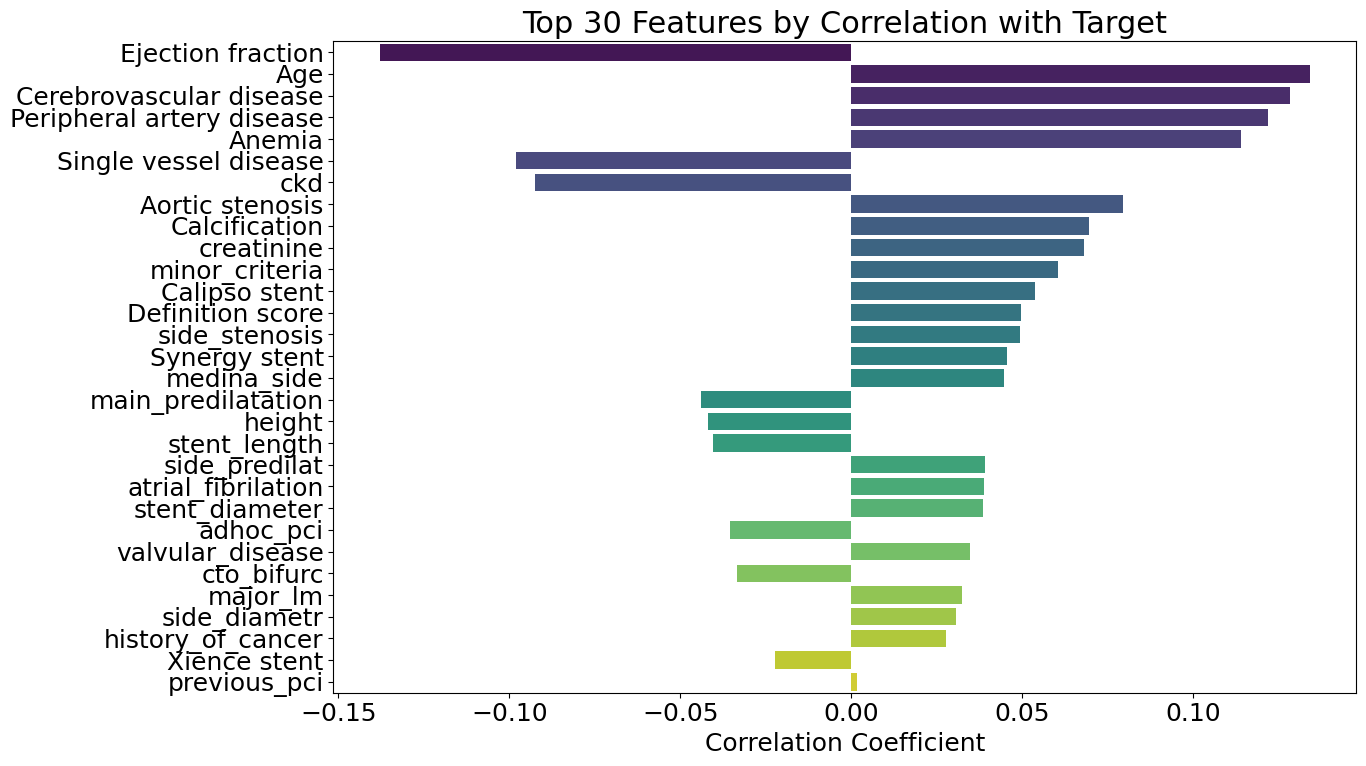

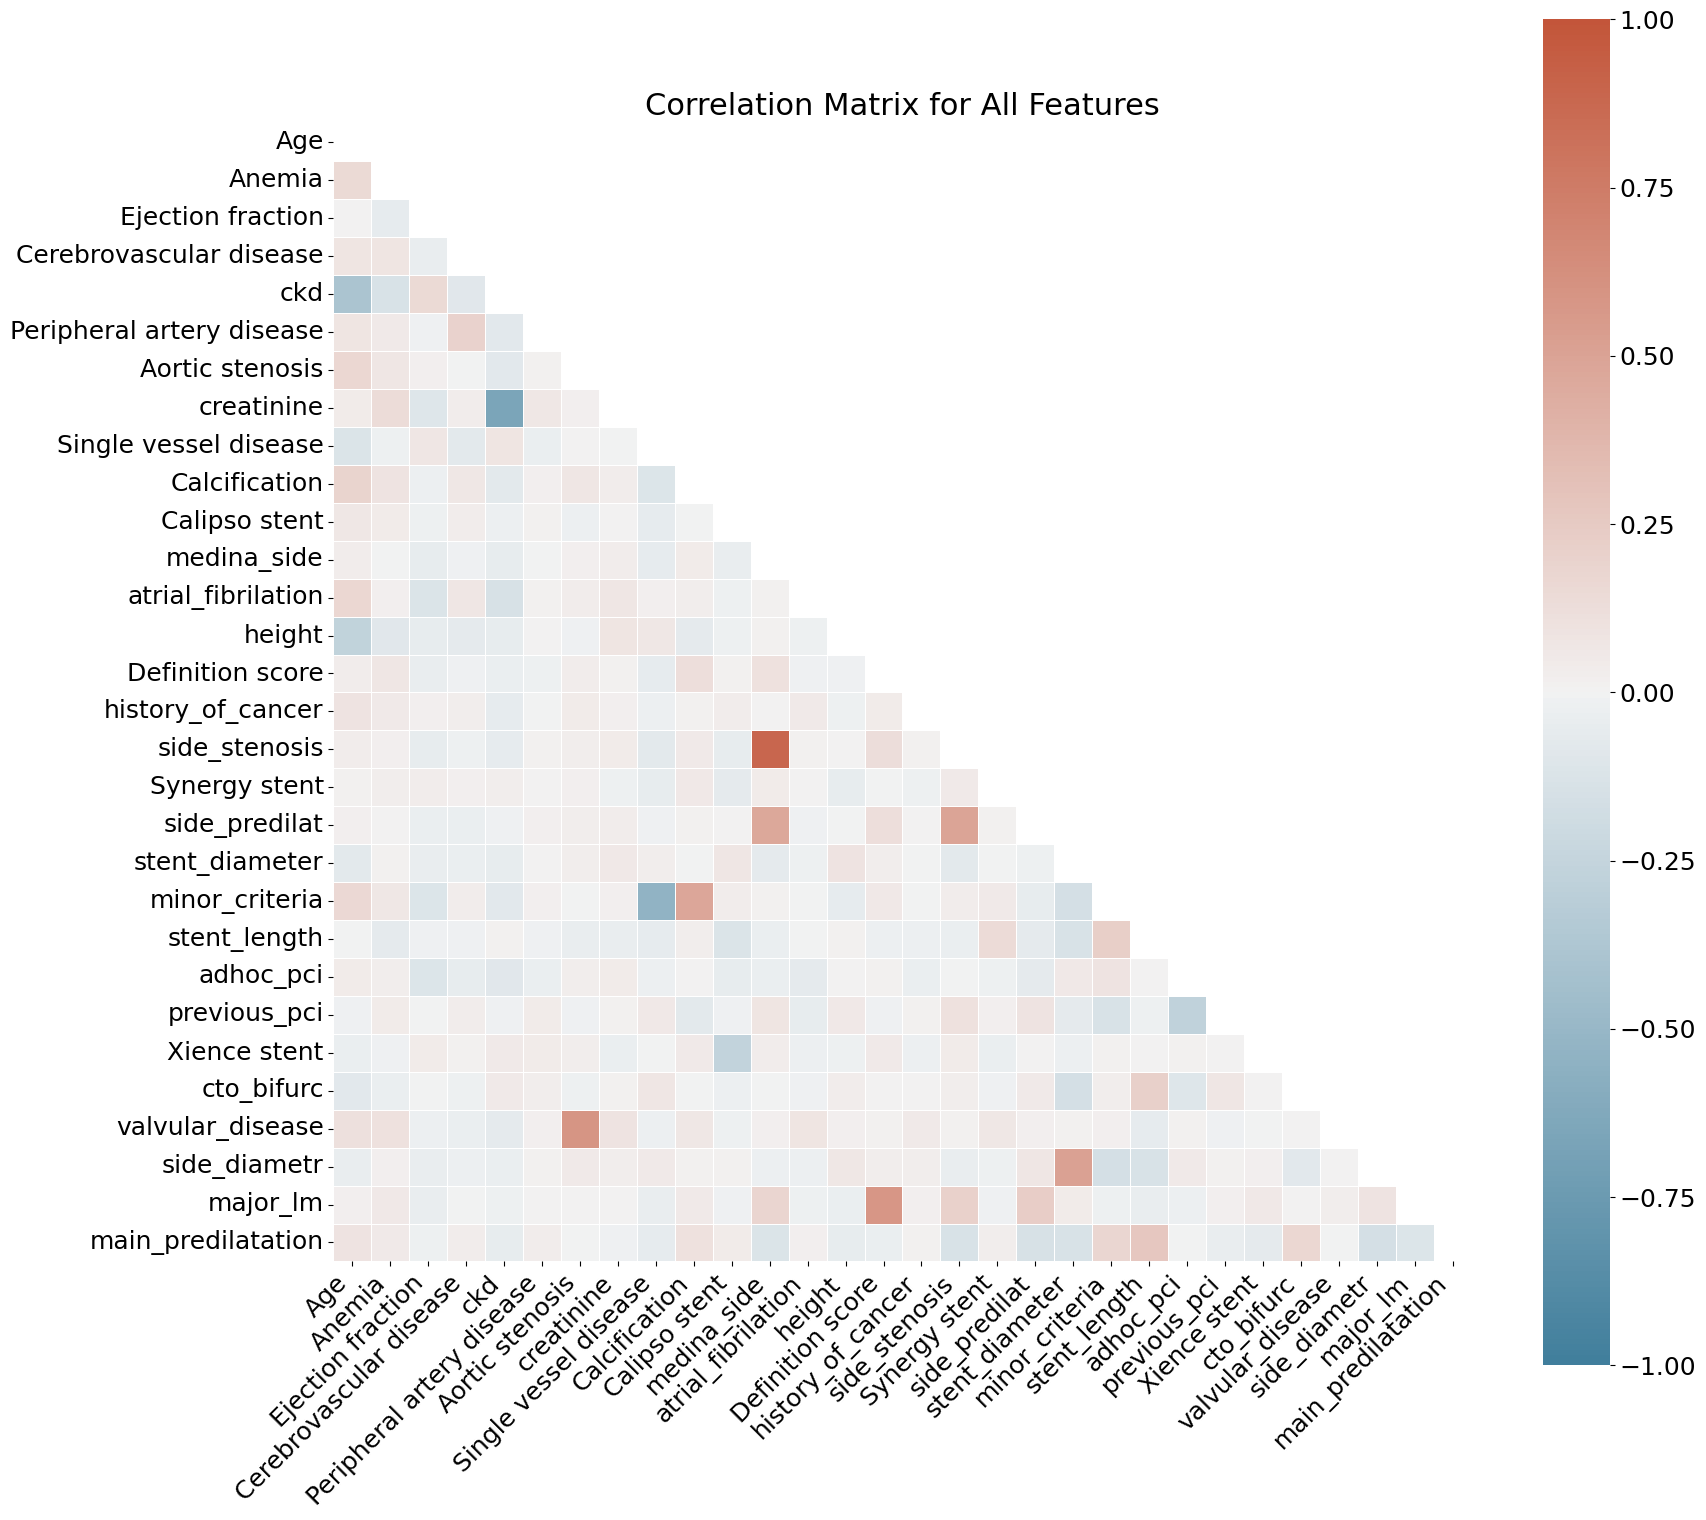


Top highly correlated feature pairs (correlation > 0.4):
medina_side <-> side_stenosis: 0.8885
ckd <-> creatinine: 0.6635
Aortic stenosis <-> valvular_disease: 0.5916
Definition score <-> major_lm: 0.5822
Single vessel disease <-> minor_criteria: 0.5365
stent_diameter <-> side_diametr: 0.5104
side_stenosis <-> side_predilat: 0.4929
Calcification <-> minor_criteria: 0.4812
medina_side <-> side_predilat: 0.4733


In [166]:
# Create a copy of the processed DataFrame for analysis
temp_df = processed_df.copy()

# Get correlations with target
target_correlations = temp_df.corr()['target'].drop('target')

# Sort by absolute correlation value
abs_correlations = target_correlations.abs().sort_values(ascending=False)
print(f"Features count: {len(abs_correlations)}")

# Visualization 1: Feature correlations with target
plt.figure(figsize=(14, 8))  # Increased figure size to accommodate longer labels
# Plot top 30 features by correlation with target
num_features = min(30, len(abs_correlations))
top_features = abs_correlations[:num_features].index
top_target_correlations = target_correlations[top_features]

# Map feature names to meaningful labels for display
feature_labels = [feature_names_map.get(feat, feat) for feat in top_target_correlations.index]

# Create a horizontal bar plot with meaningful labels
sns.barplot(x=top_target_correlations.values, y=feature_labels, 
            palette='viridis')
plt.title(f'Top {num_features} Features by Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Visualization 2: Correlation matrix between features (excluding target)
# Remove target column for feature-only correlation
features_df = processed_df.drop('target', axis=1)

# If there are too many features, select top 30 by correlation with target
if features_df.shape[1] > 30:
    top_k_features = abs_correlations[:30].index
    features_for_matrix = features_df[top_k_features]
    title = 'Correlation Matrix for Top 30 Features'
else:
    features_for_matrix = features_df
    title = 'Correlation Matrix for All Features'

# Calculate correlation matrix
corr_matrix = features_for_matrix.corr()

# Create a mapping dictionary for the features in the correlation matrix
matrix_feature_labels = {}
for col in corr_matrix.columns:
    matrix_feature_labels[col] = feature_names_map.get(col, col)

# Rename the correlation matrix indices and columns with meaningful labels
labeled_corr_matrix = corr_matrix.rename(index=matrix_feature_labels, columns=matrix_feature_labels)

# Plot correlation matrix with meaningful labels
plt.figure(figsize=(18, 16))  # Increased figure size for readability
mask = np.triu(np.ones_like(labeled_corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(labeled_corr_matrix, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, 
            center=0, square=True, linewidths=.5,
            annot=False)  # Set annot=True for smaller matrices

plt.title(title)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

# Set a threshold for high correlation
high_corr_threshold = 0.4

# Find highly correlated feature pairs - using the SAME features as in corr_matrix
matrix_columns = corr_matrix.columns  # Use exactly the columns in the correlation matrix
high_corr_pairs = []
for i in range(len(matrix_columns)):
    for j in range(i+1, len(matrix_columns)):
        feature1 = matrix_columns[i]
        feature2 = matrix_columns[j]
        correlation = abs(corr_matrix.loc[feature1, feature2])
        if correlation > high_corr_threshold:
            high_corr_pairs.append((feature1, feature2, correlation))

# Sort pairs by correlation strength
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Display the top highly correlated pairs with meaningful labels
print(f"\nTop highly correlated feature pairs (correlation > {high_corr_threshold}):")
for pair in high_corr_pairs[:30]:  # Show top 30 pairs
    feature1_label = feature_names_map.get(pair[0], pair[0])
    feature2_label = feature_names_map.get(pair[1], pair[1])
    print(f"{feature1_label} <-> {feature2_label}: {pair[2]:.4f}")

In [68]:
high_corr_pairs

[('medina_side', 'side_stenosis', 0.8884570050929018),
 ('ckd', 'creatinine', 0.6635201457073103),
 ('if_yes_what_type___1', 'valvular_disease', 0.5915853105902495),
 ('def', 'major_lm', 0.5822167791748671),
 ('single_vessel', 'minor_criteria', 0.5365306465705837),
 ('stent_diameter', 'side_diametr', 0.5103892118378606),
 ('side_stenosis', 'side_predilat', 0.4929489320607531),
 ('calcium', 'minor_criteria', 0.48116164685992263),
 ('medina_side', 'side_predilat', 0.4733433592446461)]

In [144]:
full_dataset = pd.concat([X_train, X_val, X_test], axis=0)
full_dataset['target'] = np.concatenate([y_train, y_val, y_test])
full_dataset

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,valvular_disease,side_diametr,major_lm,main_predilatation,target
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.0,0.0,0.0,...,11.0,0.0,1.0,0.0,0.0,0.000000,2.4,0.0,0.0,0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.0,1.0,0.0,...,18.0,1.0,1.0,1.0,0.0,0.000000,3.0,0.0,1.0,0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.0,1.0,0.0,...,33.0,1.0,0.0,1.0,0.0,0.000000,2.4,0.0,1.0,0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.0,0.0,1.0,...,38.0,0.0,0.0,0.0,0.0,0.000000,3.1,0.0,1.0,0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.0,0.0,0.0,...,28.0,1.0,0.0,0.0,0.0,0.000000,2.5,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,49.0,0.0,44.0,0.0,82.801900,0.0,0.0,93.0,1.0,0.0,...,20.0,1.0,0.0,0.0,0.0,-0.019089,3.5,0.0,1.0,0
405,56.0,1.0,62.0,0.0,90.755938,0.0,0.0,84.0,0.0,0.0,...,28.0,1.0,0.0,0.0,0.0,0.000000,3.5,0.0,1.0,0
406,72.0,0.0,58.0,0.0,52.827925,1.0,0.0,118.0,1.0,0.0,...,16.0,0.0,1.0,0.0,0.0,0.000000,2.3,0.0,1.0,0
407,86.0,1.0,74.0,1.0,79.313518,0.0,1.0,77.0,0.0,1.0,...,33.0,0.0,0.0,1.0,0.0,1.000000,2.5,0.0,1.0,1


In [155]:
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

full_loader = GenericDataLoader(
    full_dataset,
    target_column="target"
)

syn_model = Plugins().get("arf", random_state=42)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
synthetic_minority_features = minority_synthetic_data.drop('target', axis=1)
synthetic_target = minority_synthetic_data['target']

X_train_combined = pd.concat([full_dataset.drop('target', axis=1), synthetic_minority_features])
y_train_final = np.concatenate((full_dataset['target'].values, synthetic_target.values), axis=0)
X_train_combined['target'] = y_train_final
X_train_combined

[2025-06-01T13:37:14.189072+0400][33463][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-06-01T13:37:14.190153+0400][33463][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-06-01T13:37:14.190410+0400][33463][CRITICAL] module plugin_great load failed
[2025-06-01T13:37:14.191237+0400][33463][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


Initial accuracy is 0.8214285714285714
Iteration number 1 reached accuracy of 0.5291095890410958.
Iteration number 2 reached accuracy of 0.5403620352250489.


,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,valvular_disease,side_diametr,major_lm,main_predilatation,target
0,41.000000,0.0,49.000000,0.0,91.130343,0.0,0.0,90.000000,0.0,0.0,...,11.000000,0.0,1.0,0.0,0.0,0.000000,2.400000,0.0,0.0,0
1,56.000000,0.0,68.000000,0.0,83.132035,0.0,0.0,89.000000,1.0,0.0,...,18.000000,1.0,1.0,1.0,0.0,0.000000,3.000000,0.0,1.0,0
2,55.000000,0.0,70.000000,0.0,78.364633,0.0,0.0,94.000000,1.0,0.0,...,33.000000,1.0,0.0,1.0,0.0,0.000000,2.400000,0.0,1.0,0
3,79.000000,0.0,73.000000,1.0,64.542788,0.0,0.0,96.000000,0.0,1.0,...,38.000000,0.0,0.0,0.0,0.0,0.000000,3.100000,0.0,1.0,0
4,61.000000,0.0,62.000000,0.0,87.329657,0.0,0.0,83.000000,0.0,0.0,...,28.000000,1.0,0.0,0.0,0.0,0.000000,2.500000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4638,56.603155,0.0,60.980243,0.0,87.614679,0.0,0.0,79.484061,1.0,1.0,...,21.765263,0.0,0.0,0.0,0.0,-0.015673,1.352282,0.0,1.0,1
1659,54.932970,0.0,64.279287,0.0,95.266994,0.0,1.0,81.621353,0.0,0.0,...,20.124442,1.0,0.0,0.0,0.0,0.337544,2.658683,0.0,1.0,1
4474,65.988433,0.0,68.088929,0.0,91.920763,0.0,0.0,72.704014,0.0,1.0,...,25.636082,0.0,1.0,0.0,0.0,0.024944,3.324867,0.0,0.0,1
3367,64.555345,0.0,67.703358,0.0,62.301598,1.0,0.0,83.926583,0.0,1.0,...,27.706139,0.0,1.0,0.0,0.0,-0.000207,2.464227,0.0,1.0,1


In [156]:
import importlib
import edge_case
importlib.reload(edge_case)
from edge_case import generate_edge_cases

edge_cases = generate_edge_cases(num_samples=150)
edge_cases['target'] = edge_cases['mortality']
edge_cases.drop('mortality', axis=1)
edge_cases

,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,minor_criteria,side_predilat,side_stenosis,valvular_disease,mortality,smoking,dyslipidemia,anemia,atrial_fibrilation,target
0,96.709589,148.379351,4,27.669009,1,0,1,1,1,0,...,6,1,95.199101,1,1,1,0,0,1,1
1,97.112784,154.855881,5,27.583409,1,1,0,1,1,1,...,5,1,83.256021,0,0,1,1,1,1,0
2,96.289889,162.000222,4,17.862447,0,1,1,1,1,1,...,4,1,91.580379,1,1,1,1,1,0,1
3,91.280503,148.090838,4,17.859167,1,1,0,1,1,1,...,3,1,88.210230,1,1,1,1,1,1,1
4,89.547337,140.717098,5,16.393031,1,1,1,1,1,1,...,5,1,87.106499,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,86.589006,159.143979,5,17.299728,1,1,1,1,1,1,...,5,1,80.267850,1,1,1,1,1,1,1
146,90.297248,159.668185,5,22.302632,1,1,0,1,0,1,...,6,0,98.833005,1,1,1,1,1,1,1
147,86.892569,167.633452,5,15.998619,1,1,1,1,1,1,...,6,1,79.258931,1,1,1,1,0,0,1
148,99.251765,164.117267,5,23.220661,1,0,1,1,1,1,...,5,1,78.256096,0,0,0,1,0,1,0


In [157]:
edge_case_cols = set(edge_cases.columns)
x_train_cols = set(X_train_combined.columns)

common_cols = edge_case_cols.intersection(x_train_cols)
only_in_edge_cases = edge_case_cols - x_train_cols
only_in_x_train = x_train_cols - edge_case_cols

print(f"COMPARISON OF COLUMNS:")
print(f"\nTotal columns in edge_cases: {len(edge_case_cols)}")
print(f"Total columns in X_train: {len(x_train_cols)}")
print(f"Number of common columns: {len(common_cols)}")

print("\n--- COMMON COLUMNS ---")
for col in sorted(common_cols):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN EDGE CASES ---")
for col in sorted(only_in_edge_cases):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN X_TRAIN ---")
for col in sorted(only_in_x_train):
    print(f"- {col}")

COMPARISON OF COLUMNS:

Total columns in edge_cases: 38
Total columns in X_train: 31
Number of common columns: 31

--- COMMON COLUMNS ---
- adhoc_pci
- age
- anemia
- atrial_fibrilation
- calcium
- cerebrovascular_disease
- ckd
- creatinine
- cto_bifurc
- def
- ef
- height
- history_of_cancer
- if_yes_what_type___1
- main_predilatation
- major_lm
- medina_side
- minor_criteria
- peripheral_artery_disease
- previous_pci
- side_diametr
- side_predilat
- side_stenosis
- single_vessel
- stent_diameter
- stent_length
- stent_type___3
- stent_type___4
- stent_type___5
- target
- valvular_disease

--- COLUMNS ONLY IN EDGE CASES ---
- clinical_presentation
- dyslipidemia
- mortality
- previous_stroke_tia
- restenosis_reocclusion
- smoking
- trifurcation

--- COLUMNS ONLY IN X_TRAIN ---


In [158]:
edge_cases_features_names = [feature for feature in edge_cases.columns if feature in X_train_combined.columns]
edge_cases_features = pd.DataFrame(edge_cases, columns=edge_cases_features_names)
X_train_combined = pd.concat([X_train_combined, edge_cases_features])
X_train_combined

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,valvular_disease,side_diametr,major_lm,main_predilatation,target
0,41.000000,0.0,49.000000,0.0,91.130343,0.0,0.0,90.000000,0.0,0.0,...,11.000000,0.0,1.0,0.0,0.0,0.0,2.400000,0.0,0.0,0
1,56.000000,0.0,68.000000,0.0,83.132035,0.0,0.0,89.000000,1.0,0.0,...,18.000000,1.0,1.0,1.0,0.0,0.0,3.000000,0.0,1.0,0
2,55.000000,0.0,70.000000,0.0,78.364633,0.0,0.0,94.000000,1.0,0.0,...,33.000000,1.0,0.0,1.0,0.0,0.0,2.400000,0.0,1.0,0
3,79.000000,0.0,73.000000,1.0,64.542788,0.0,0.0,96.000000,0.0,1.0,...,38.000000,0.0,0.0,0.0,0.0,0.0,3.100000,0.0,1.0,0
4,61.000000,0.0,62.000000,0.0,87.329657,0.0,0.0,83.000000,0.0,0.0,...,28.000000,1.0,0.0,0.0,0.0,0.0,2.500000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,86.589006,1.0,17.299728,1.0,24.846193,1.0,1.0,312.982972,1.0,1.0,...,36.973942,0.0,0.0,1.0,0.0,1.0,1.987364,1.0,0.0,1
146,90.297248,1.0,22.302632,1.0,40.785853,1.0,0.0,476.231091,1.0,0.0,...,30.193046,1.0,1.0,1.0,1.0,1.0,1.679947,1.0,1.0,1
147,86.892569,0.0,15.998619,1.0,43.426784,1.0,1.0,321.471372,1.0,1.0,...,36.697756,1.0,1.0,0.0,1.0,1.0,1.193943,1.0,1.0,1
148,99.251765,0.0,23.220661,1.0,44.324896,0.0,1.0,589.744272,1.0,1.0,...,36.236023,0.0,1.0,1.0,1.0,0.0,1.336135,0.0,1.0,0


Features count: 30


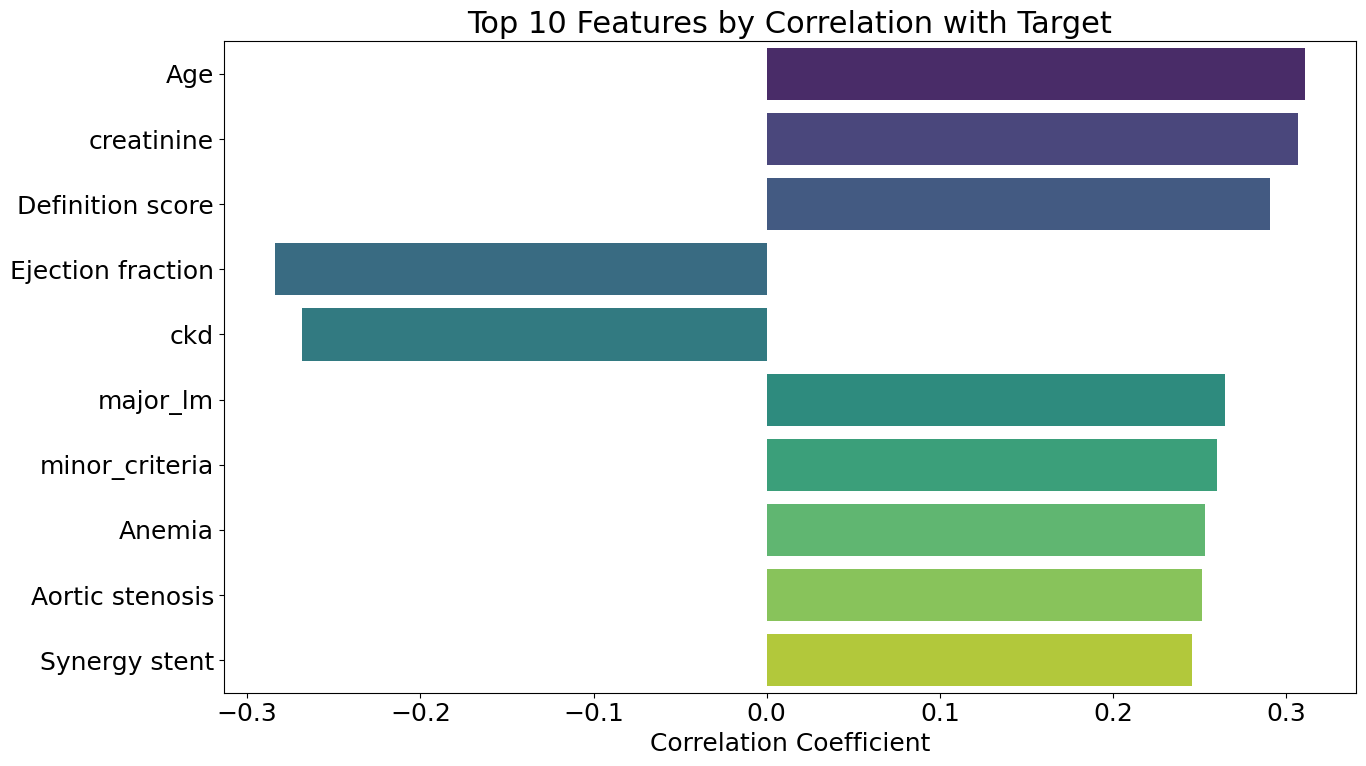

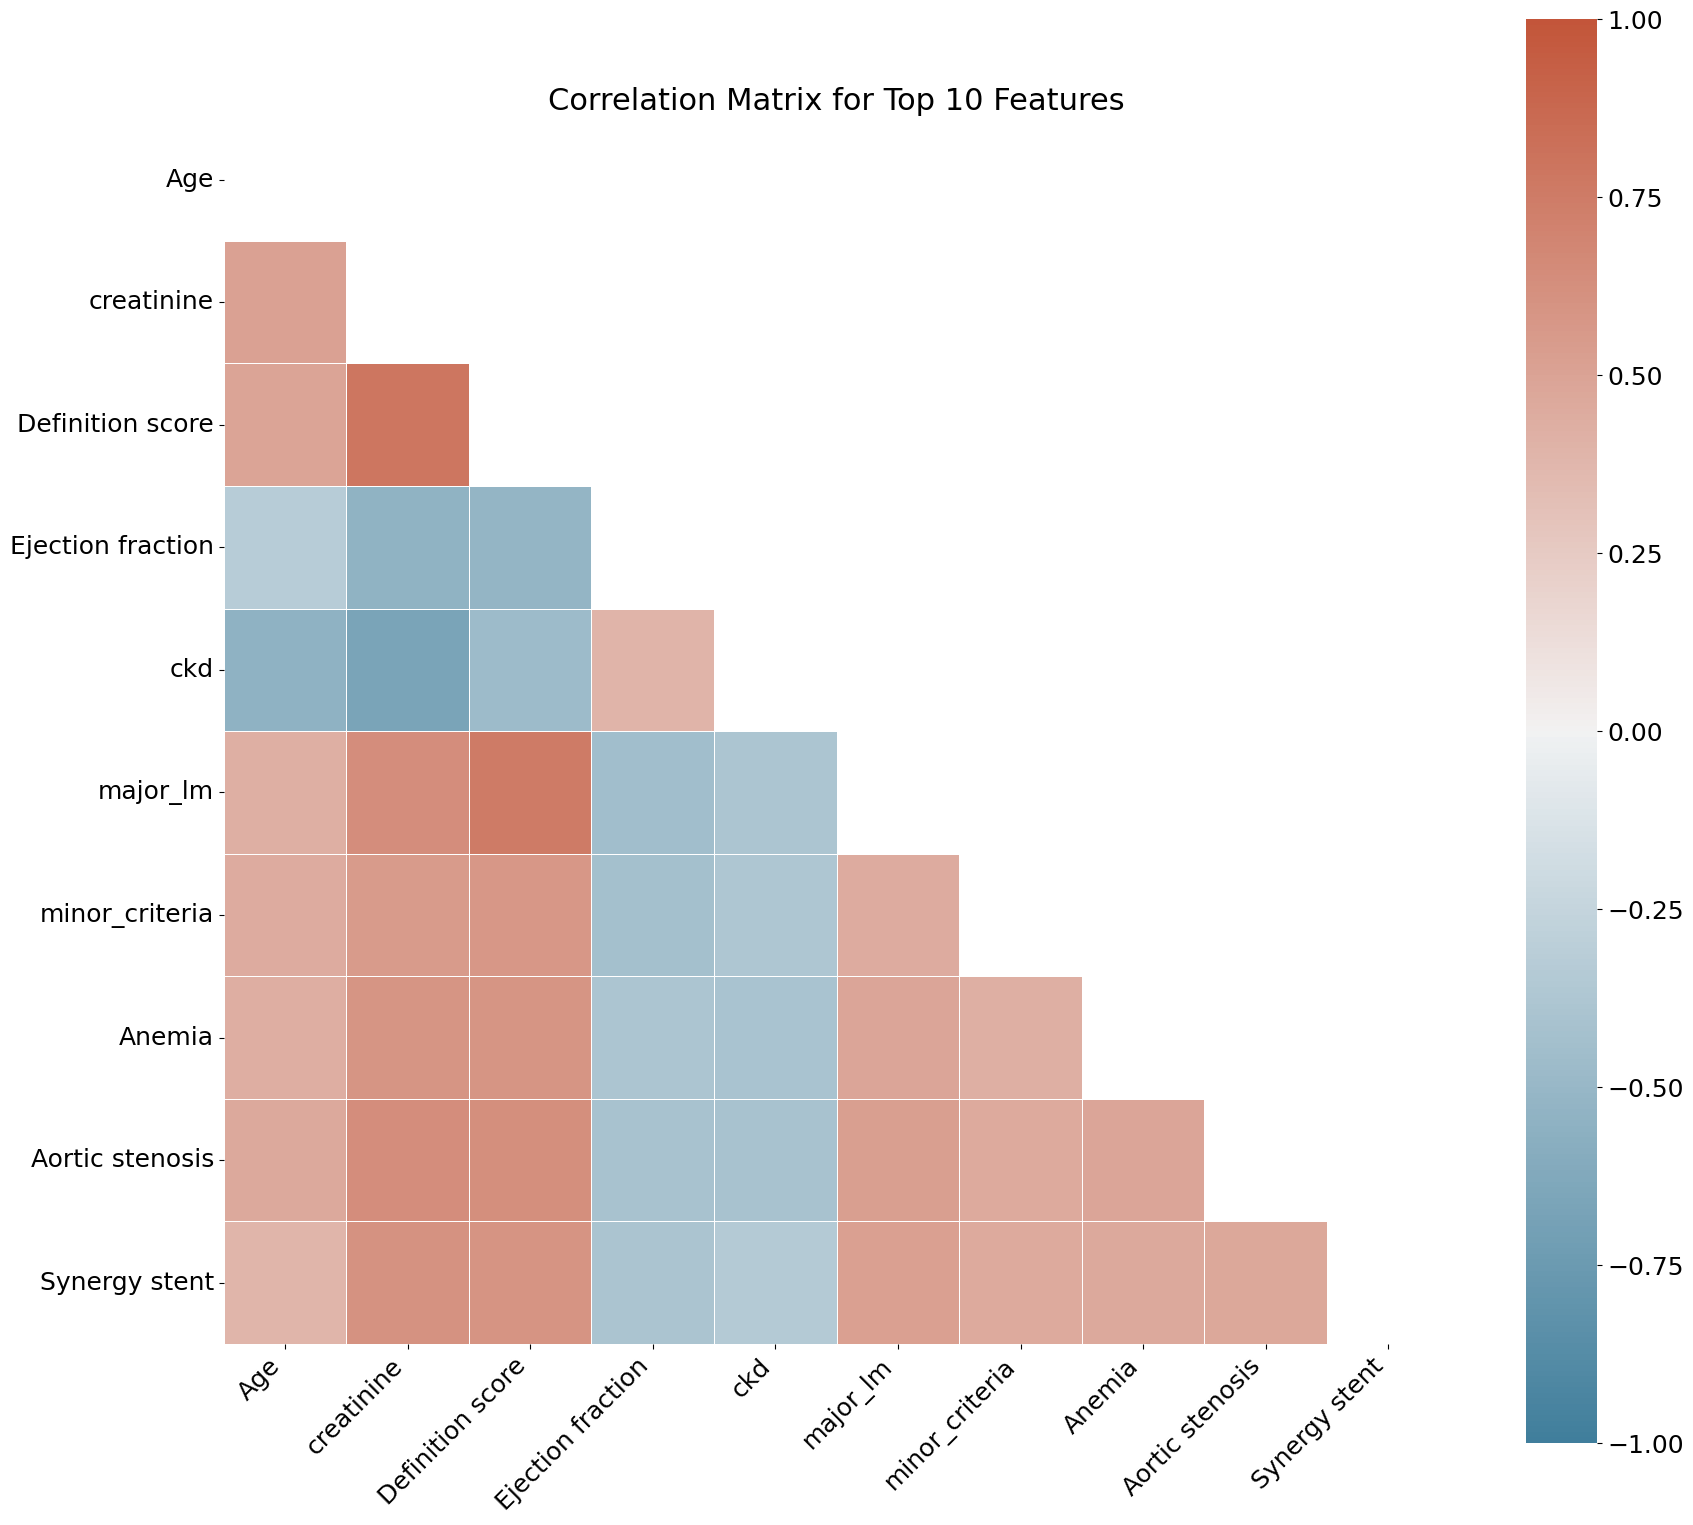


Top highly correlated feature pairs (correlation > 0.4):
creatinine <-> Definition score: 0.7823
Definition score <-> major_lm: 0.7521
creatinine <-> ckd: 0.6661
creatinine <-> major_lm: 0.6373
creatinine <-> Aortic stenosis: 0.6328
Definition score <-> Aortic stenosis: 0.6317
creatinine <-> Synergy stent: 0.6024
Definition score <-> Synergy stent: 0.5962
Definition score <-> Anemia: 0.5904
creatinine <-> Anemia: 0.5860


In [165]:
# Create a copy of the processed DataFrame for analysis
temp_df = X_train_combined.copy()

# Get correlations with target
target_correlations = temp_df.corr()['target'].drop('target')

# Sort by absolute correlation value
abs_correlations = target_correlations.abs().sort_values(ascending=False)
print(f"Features count: {len(abs_correlations)}")

# Visualization 1: Feature correlations with target
plt.figure(figsize=(14, 8))  # Increased figure size to accommodate longer labels
# Plot top 10 features by correlation with target
num_features = min(10, len(abs_correlations))
top_features = abs_correlations[:num_features].index
top_target_correlations = target_correlations[top_features]

# Map feature names to meaningful labels for display
feature_labels = [feature_names_map.get(feat, feat) for feat in top_target_correlations.index]

# Create a horizontal bar plot with meaningful labels
sns.barplot(x=top_target_correlations.values, y=feature_labels, 
            palette='viridis')
plt.title(f'Top {num_features} Features by Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Visualization 2: Correlation matrix between features (excluding target)
# Remove target column for feature-only correlation
features_df = X_train_combined.drop('target', axis=1)

# If there are too many features, select top 10 by correlation with target
if features_df.shape[1] > 10:
    top_k_features = abs_correlations[:10].index
    features_for_matrix = features_df[top_k_features]
    title = 'Correlation Matrix for Top 10 Features'
else:
    features_for_matrix = features_df
    title = 'Correlation Matrix for All Features'

# Calculate correlation matrix
corr_matrix = features_for_matrix.corr()

# Create a mapping dictionary for the features in the correlation matrix
matrix_feature_labels = {}
for col in corr_matrix.columns:
    matrix_feature_labels[col] = feature_names_map.get(col, col)

# Rename the correlation matrix indices and columns with meaningful labels
labeled_corr_matrix = corr_matrix.rename(index=matrix_feature_labels, columns=matrix_feature_labels)

# Plot correlation matrix with meaningful labels
plt.figure(figsize=(18, 16))  # Increased figure size for readability
mask = np.triu(np.ones_like(labeled_corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(labeled_corr_matrix, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, 
            center=0, square=True, linewidths=.5,
            annot=False)  # Set annot=True for smaller matrices

plt.title(title)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

# Set a threshold for high correlation
high_corr_threshold = 0.4

# Find highly correlated feature pairs - using the SAME features as in corr_matrix
matrix_columns = corr_matrix.columns  # Use exactly the columns in the correlation matrix
high_corr_pairs = []
for i in range(len(matrix_columns)):
    for j in range(i+1, len(matrix_columns)):
        feature1 = matrix_columns[i]
        feature2 = matrix_columns[j]
        correlation = abs(corr_matrix.loc[feature1, feature2])
        if correlation > high_corr_threshold:
            high_corr_pairs.append((feature1, feature2, correlation))

# Sort pairs by correlation strength
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Display the top highly correlated pairs with meaningful labels
print(f"\nTop highly correlated feature pairs (correlation > {high_corr_threshold}):")
for pair in high_corr_pairs[:10]:  # Show top 10 pairs
    feature1_label = feature_names_map.get(pair[0], pair[0])
    feature2_label = feature_names_map.get(pair[1], pair[1])
    print(f"{feature1_label} <-> {feature2_label}: {pair[2]:.4f}")

Features count: 30


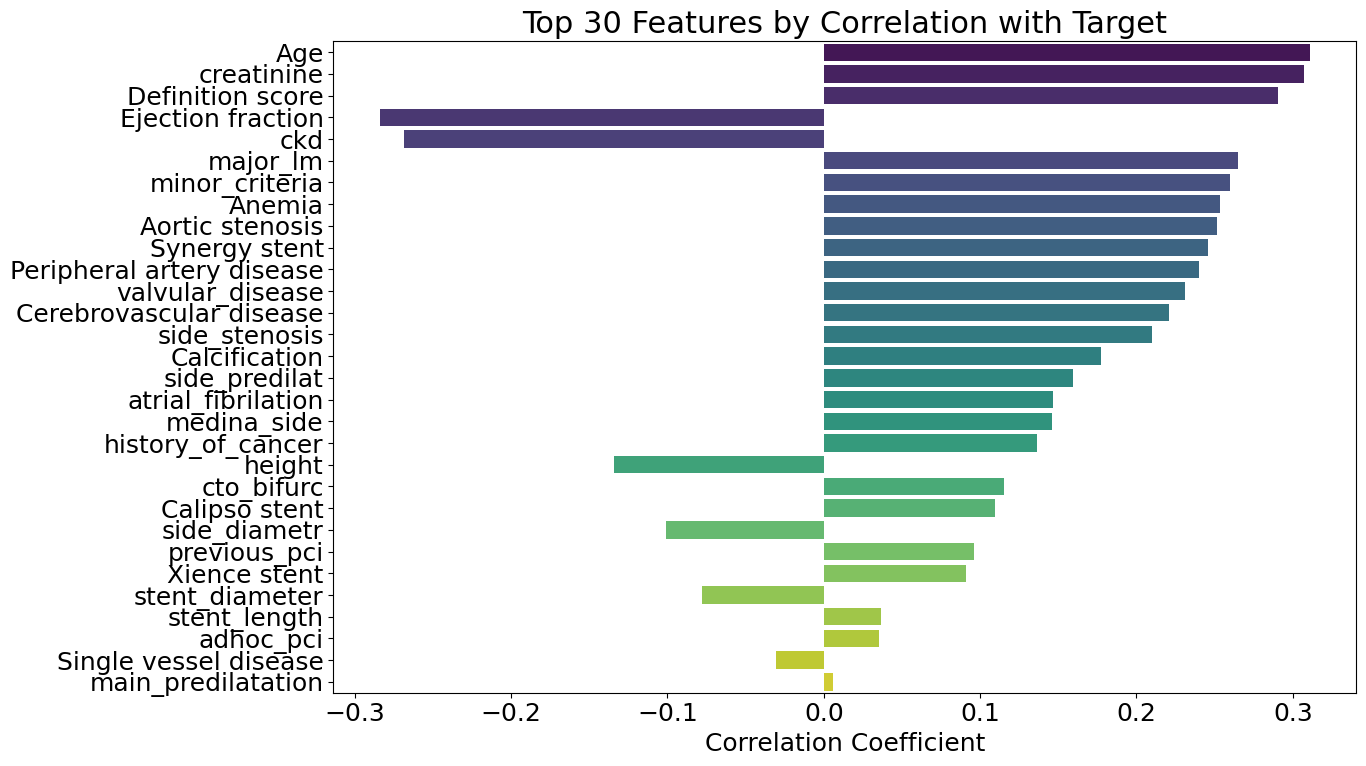

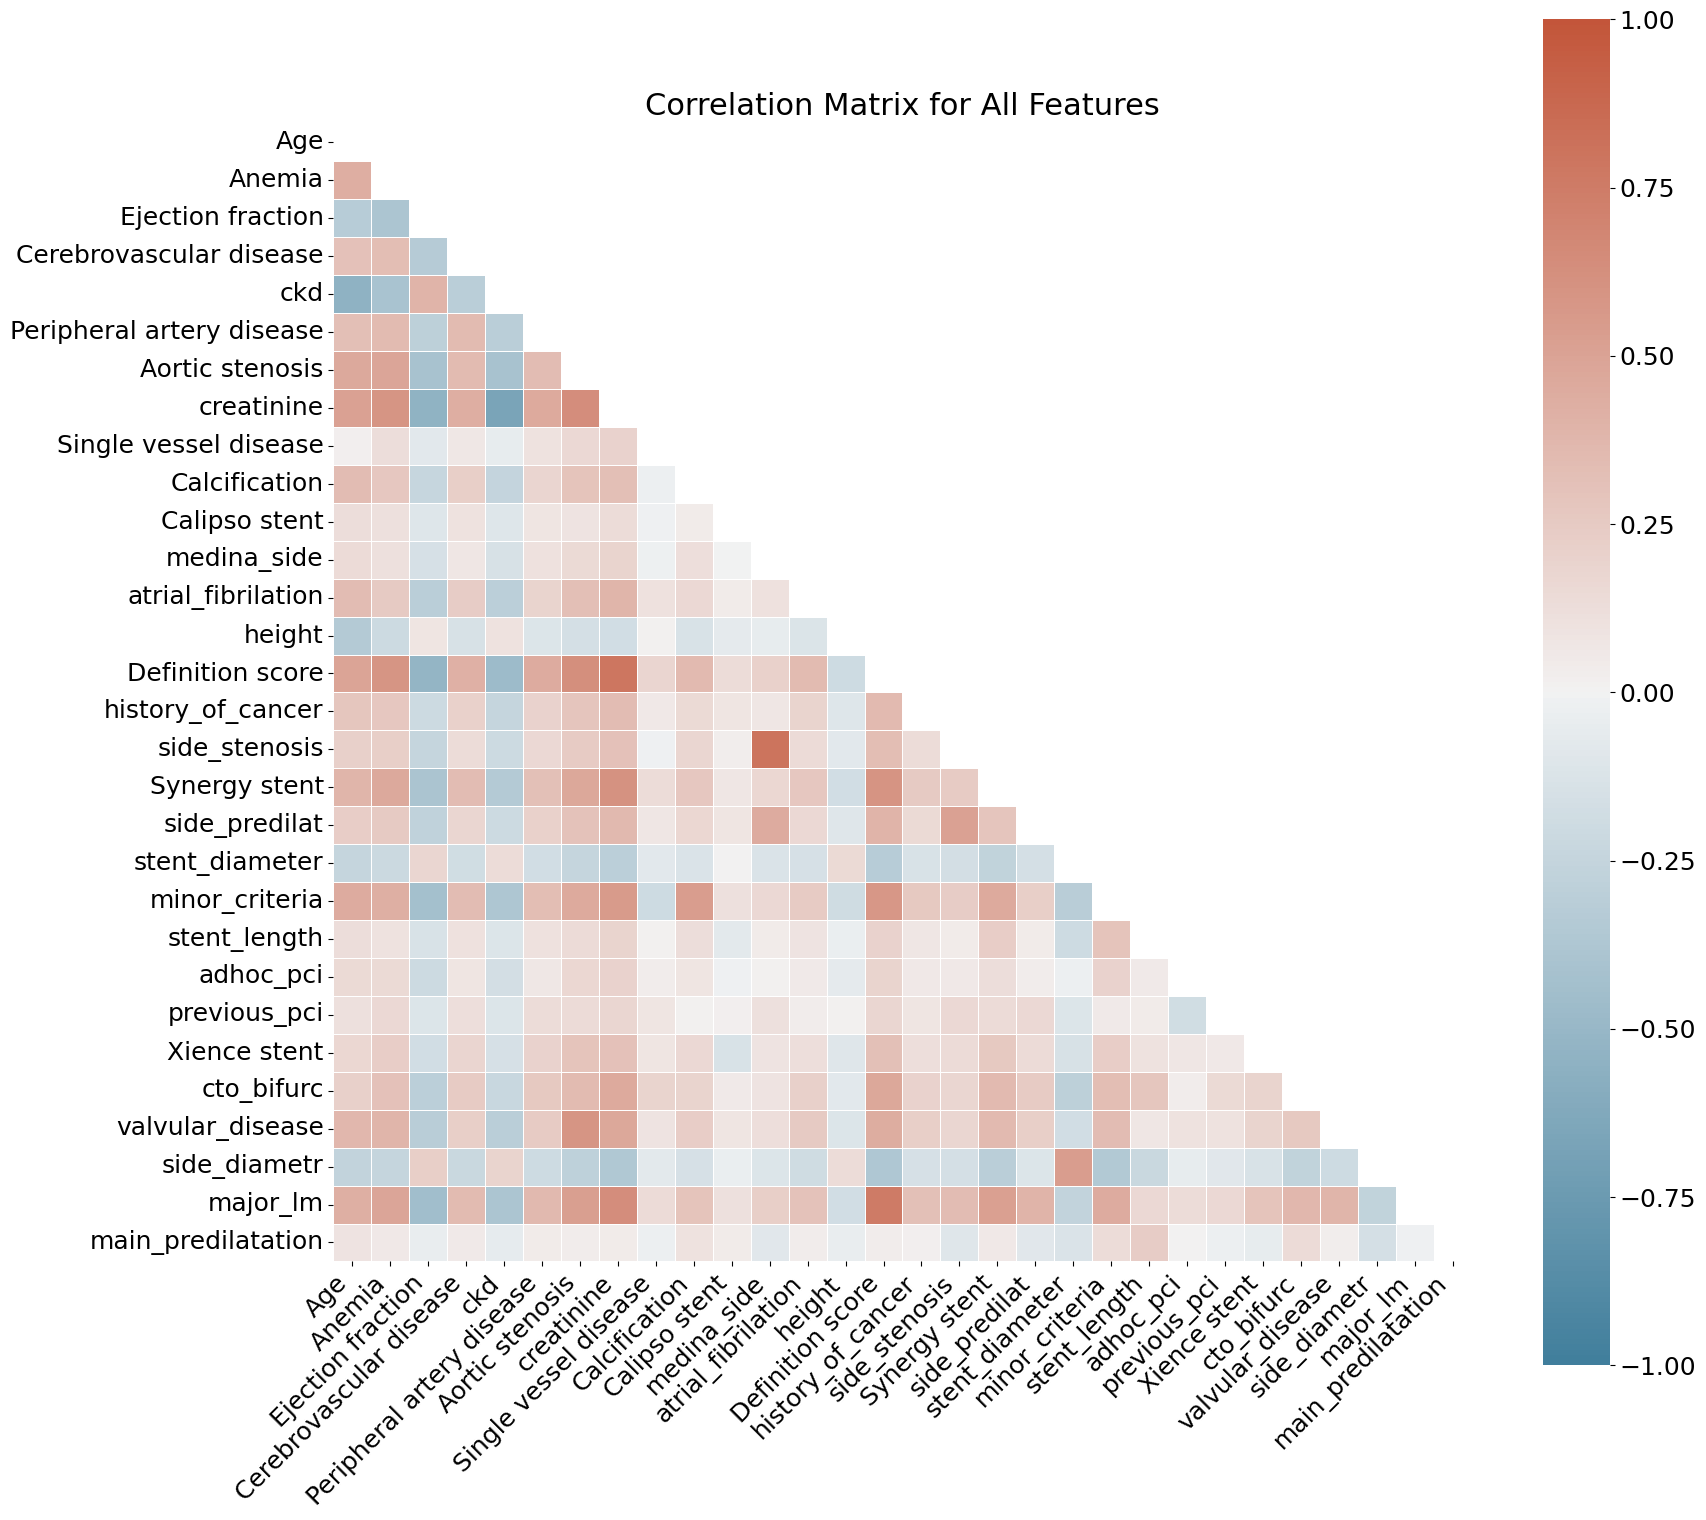


Top highly correlated feature pairs (correlation > 0.4):
medina_side <-> side_stenosis: 0.8024
creatinine <-> Definition score: 0.7823
Definition score <-> major_lm: 0.7521
ckd <-> creatinine: 0.6661
creatinine <-> major_lm: 0.6373
Aortic stenosis <-> creatinine: 0.6328
Aortic stenosis <-> Definition score: 0.6317
creatinine <-> Synergy stent: 0.6024
Definition score <-> Synergy stent: 0.5962
Aortic stenosis <-> valvular_disease: 0.5922
Anemia <-> Definition score: 0.5904
Anemia <-> creatinine: 0.5860
Definition score <-> minor_criteria: 0.5752
creatinine <-> minor_criteria: 0.5505
Age <-> ckd: 0.5492
Ejection fraction <-> creatinine: 0.5450
Calcification <-> minor_criteria: 0.5372
stent_diameter <-> side_diametr: 0.5323
Aortic stenosis <-> major_lm: 0.5286
Ejection fraction <-> Definition score: 0.5225
Synergy stent <-> major_lm: 0.5156
side_stenosis <-> side_predilat: 0.5134
Age <-> creatinine: 0.5079
Age <-> Definition score: 0.4999
Anemia <-> major_lm: 0.4915
Anemia <-> Aortic ste

In [164]:
# Create a copy of the processed DataFrame for analysis
temp_df = X_train_combined.copy()

# Get correlations with target
target_correlations = temp_df.corr()['target'].drop('target')

# Sort by absolute correlation value
abs_correlations = target_correlations.abs().sort_values(ascending=False)
print(f"Features count: {len(abs_correlations)}")

# Visualization 1: Feature correlations with target
plt.figure(figsize=(14, 8))  # Increased figure size to accommodate longer labels
# Plot top 30 features by correlation with target
num_features = min(30, len(abs_correlations))
top_features = abs_correlations[:num_features].index
top_target_correlations = target_correlations[top_features]

# Map feature names to meaningful labels for display
feature_labels = [feature_names_map.get(feat, feat) for feat in top_target_correlations.index]

# Create a horizontal bar plot with meaningful labels
sns.barplot(x=top_target_correlations.values, y=feature_labels, 
            palette='viridis')
plt.title(f'Top {num_features} Features by Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Visualization 2: Correlation matrix between features (excluding target)
# Remove target column for feature-only correlation
features_df = X_train_combined.drop('target', axis=1)

# If there are too many features, select top 30 by correlation with target
if features_df.shape[1] > 30:
    top_k_features = abs_correlations[:30].index
    features_for_matrix = features_df[top_k_features]
    title = 'Correlation Matrix for Top 30 Features'
else:
    features_for_matrix = features_df
    title = 'Correlation Matrix for All Features'

# Calculate correlation matrix
corr_matrix = features_for_matrix.corr()

# Create a mapping dictionary for the features in the correlation matrix
matrix_feature_labels = {}
for col in corr_matrix.columns:
    matrix_feature_labels[col] = feature_names_map.get(col, col)

# Rename the correlation matrix indices and columns with meaningful labels
labeled_corr_matrix = corr_matrix.rename(index=matrix_feature_labels, columns=matrix_feature_labels)

# Plot correlation matrix with meaningful labels
plt.figure(figsize=(18, 16))  # Increased figure size for readability
mask = np.triu(np.ones_like(labeled_corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(labeled_corr_matrix, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, 
            center=0, square=True, linewidths=.5,
            annot=False)  # Set annot=True for smaller matrices

plt.title(title)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

# Set a threshold for high correlation
high_corr_threshold = 0.4

# Find highly correlated feature pairs - using the SAME features as in corr_matrix
matrix_columns = corr_matrix.columns  # Use exactly the columns in the correlation matrix
high_corr_pairs = []
for i in range(len(matrix_columns)):
    for j in range(i+1, len(matrix_columns)):
        feature1 = matrix_columns[i]
        feature2 = matrix_columns[j]
        correlation = abs(corr_matrix.loc[feature1, feature2])
        if correlation > high_corr_threshold:
            high_corr_pairs.append((feature1, feature2, correlation))

# Sort pairs by correlation strength
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Display the top highly correlated pairs with meaningful labels
print(f"\nTop highly correlated feature pairs (correlation > {high_corr_threshold}):")
for pair in high_corr_pairs[:30]:  # Show top 30 pairs
    feature1_label = feature_names_map.get(pair[0], pair[0])
    feature2_label = feature_names_map.get(pair[1], pair[1])
    print(f"{feature1_label} <-> {feature2_label}: {pair[2]:.4f}")

## remove correlated features

In [76]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease', 'ckd',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'creatinine',
       'single_vessel', 'calcium', 'stent_type___3', 'medina_side',
       'atrial_fibrilation', 'height', 'def', 'history_of_cancer',
       'side_stenosis', 'stent_type___5', 'side_predilat', 'stent_diameter',
       'minor_criteria', 'stent_length', 'adhoc_pci', 'previous_pci',
       'stent_type___4', 'cto_bifurc', 'valvular_disease', 'side_diametr',
       'major_lm', 'main_predilatation'],
      dtype='object')

In [77]:
columns_to_preserve

['valvular_disease', 'previous_stroke_tia', 'twostent_technique']

In [78]:
corr_matrix = X_train.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.4

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

to_drop

['ckd',
 'creatinine',
 'side_stenosis',
 'side_predilat',
 'minor_criteria',
 'valvular_disease',
 'side_diametr',
 'major_lm']

In [79]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

X_train

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,stent_type___5,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,main_predilatation
0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.00,11.0,0.0,1.0,0.0,0.0,0.0
1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.75,18.0,1.0,1.0,1.0,0.0,1.0
2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.75,33.0,1.0,0.0,1.0,0.0,1.0
3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.50,38.0,0.0,0.0,0.0,0.0,1.0
4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.00,28.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.50,32.0,0.0,1.0,0.0,0.0,1.0
1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.50,23.0,0.0,0.0,0.0,0.0,1.0
1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.75,18.0,0.0,1.0,0.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.00,18.0,0.0,1.0,0.0,0.0,1.0


In [36]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'stent_type___5',
       'previous_stroke_tia', 'stent_diameter', 'stent_length', 'adhoc_pci',
       'previous_pci', 'stent_type___4', 'cto_bifurc'],
      dtype='object')

In [80]:
processed_df= pd.concat([X_train, X_test, X_val], axis=0)
processed_df['target'] = np.concatenate([y_train, y_test, y_val])
processed_df

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,history_of_cancer,stent_type___5,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,main_predilatation,target
0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,4.00,11.0,0.0,1.0,0.0,0.0,0.0,0
1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.75,18.0,1.0,1.0,1.0,0.0,1.0,0
2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.75,33.0,1.0,0.0,1.0,0.0,1.0,0
3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.50,38.0,0.0,0.0,0.0,0.0,1.0,0
4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.00,28.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,57.0,0.0,61.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,3.50,18.0,0.0,1.0,0.0,0.0,0.0,0
405,80.0,1.0,46.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.00,15.0,0.0,1.0,0.0,0.0,1.0,0
406,68.0,0.0,63.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.50,23.0,0.0,1.0,0.0,0.0,1.0,0
407,61.0,0.0,57.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,3.00,30.0,1.0,1.0,0.0,0.0,1.0,0


In [163]:
feature_names_map = {
  'age': 'Age',
  'ef': 'Ejection fraction',
  'anemia': 'Anemia',
  'cerebrovascular_disease': 'Cerebrovascular disease',
  'peripheral_artery_disease': 'Peripheral artery disease',
  'single_vessel': 'Single vessel disease',
  'if_yes_what_type___1': "Aortic stenosis",
  'calcium': 'Calcification',
  'stent_type___3': 'Calipso stent',
  'def': 'Definition score',
  'stent_type___4': 'Xience stent',
  'stent_type___5': 'Synergy stent'
}

Features count: 30


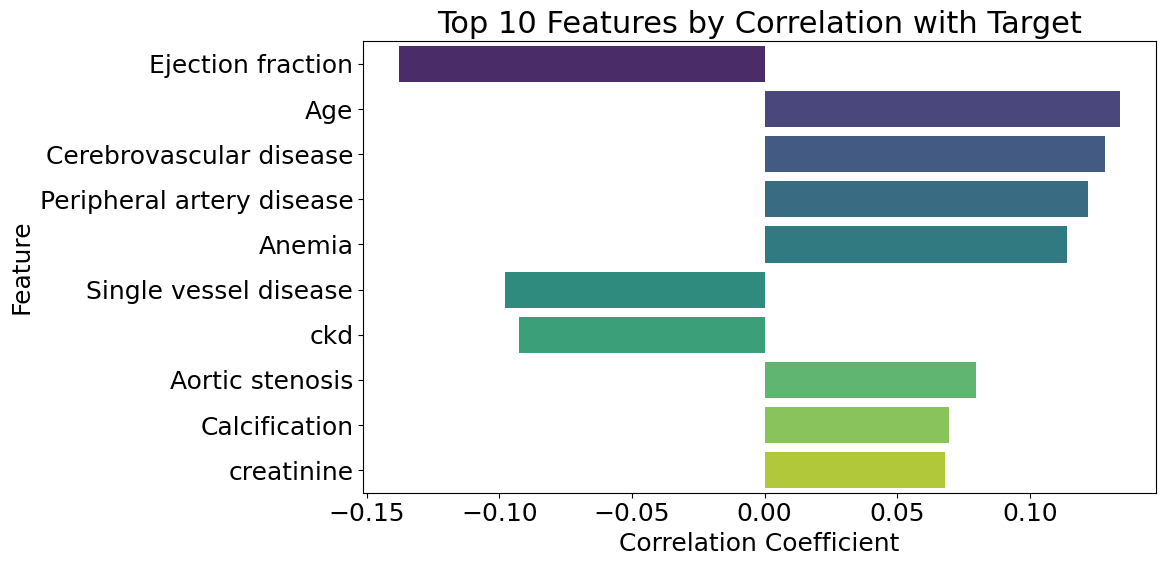

In [139]:
# Create a copy of the processed DataFrame for analysis
temp_df = processed_df.copy()

# Get correlations with target
target_correlations = temp_df.corr()['target'].drop('target')

# Sort by absolute correlation value
abs_correlations = target_correlations.abs().sort_values(ascending=False)
print(f"Features count: {len(abs_correlations)}")

# Get top features
num_features = min(10, len(abs_correlations))
top_features = abs_correlations[:num_features].index
top_target_correlations = target_correlations[top_features]

# Create a dictionary to map original feature names to readable ones
plot_data = []
for feature in top_features:
    readable_name = feature_names_map.get(feature, feature)
    plot_data.append({
        'Feature': readable_name,
        'Correlation': target_correlations[feature]
    })

# Create a DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

# Visualization 1: Feature correlations with target
plt.figure(figsize=(12, 6))
# Create a horizontal bar plot
sns.barplot(x='Correlation', y='Feature', data=plot_df, palette='viridis')
plt.title(f'Top {num_features} Features by Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [ ]:
feature_names_map = {
  'age': 'Age',
  'ef': 'Ejection fraction',
  'anemia': 'Anemia',
  'cerebrovascular_disease': 'Cerebrovascular disease',
  'peripheral_artery_disease': 'Peripheral artery disease',
  'single_vessel': 'Single vessel disease',
  'if_yes_what_type__1': "Aortic stenosis",
  'calcium': 'Calcification',
  'stent_type__3': 'Calipso stent',
  'def': 'Definition score',
}

In [37]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)

(1226, 22)
(409, 22)
(409, 22)
(1226,)


In [38]:
print(X_train.columns)

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'stent_type___5',
       'previous_stroke_tia', 'stent_diameter', 'stent_length', 'adhoc_pci',
       'previous_pci', 'stent_type___4', 'cto_bifurc'],
      dtype='object')


In [39]:
X_test['height']

0      150.0
1      164.0
2      176.0
3      174.0
4      164.0
       ...  
404    172.0
405    160.0
406    177.0
407    153.0
408    168.0
Name: height, Length: 409, dtype: float64

# edge case

In [40]:
import importlib
import edge_case
importlib.reload(edge_case)
from edge_case import generate_edge_cases

edge_cases = generate_edge_cases(num_samples=150)
edge_cases


,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,restenosis_reocclusion,adhoc_pci,main_predilatation,stent_diameter,stent_length,mortality,smoking,dyslipidemia,anemia,atrial_fibrilation
0,99.771828,162.656157,5,23.478699,1,0,1,1,1,1,...,1,1,1,2.578001,37.957531,1,0,1,1,1
1,87.981583,141.108064,4,22.423458,1,1,1,1,1,1,...,1,1,0,2.716252,35.338682,1,1,1,1,1
2,88.049181,166.274149,5,20.219641,1,1,1,1,1,1,...,1,1,1,2.706499,33.716948,1,1,1,1,1
3,88.363833,143.172405,4,19.593827,1,1,1,1,1,0,...,0,1,0,2.452948,33.953364,1,1,1,1,0
4,92.837074,157.724184,5,29.618538,1,1,1,1,1,1,...,1,1,1,2.186525,37.494407,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,88.760737,151.489525,5,20.285410,1,1,1,1,1,1,...,1,1,1,2.506936,33.884981,1,1,1,1,1
146,91.802164,159.733229,5,26.483618,1,0,1,1,1,1,...,1,1,1,2.490744,37.237542,1,0,1,1,1
147,86.429513,149.133897,4,25.470615,1,1,0,1,1,1,...,0,1,1,2.628669,32.265422,1,1,1,1,1
148,86.227922,152.562412,5,15.371888,1,1,1,1,1,1,...,0,1,1,2.280820,36.567978,1,1,0,0,1


In [41]:
edge_cases.columns

Index(['age', 'height', 'clinical_presentation', 'ef',
       'cerebrovascular_disease', 'peripheral_artery_disease',
       'if_yes_what_type___1', 'single_vessel', 'calcium', 'medina_side',
       'trifurcation', 'cto_bifurc', 'def', 'history_of_cancer',
       'previous_pci', 'previous_stroke_tia', 'side_diametr', 'stent_type___3',
       'stent_type___4', 'stent_type___5', 'restenosis_reocclusion',
       'adhoc_pci', 'main_predilatation', 'stent_diameter', 'stent_length',
       'mortality', 'smoking', 'dyslipidemia', 'anemia', 'atrial_fibrilation'],
      dtype='object')

In [42]:
edge_case_cols = set(edge_cases.columns)
x_train_cols = set(X_train.columns)

common_cols = edge_case_cols.intersection(x_train_cols)
only_in_edge_cases = edge_case_cols - x_train_cols
only_in_x_train = x_train_cols - edge_case_cols

print(f"COMPARISON OF COLUMNS:")
print(f"\nTotal columns in edge_cases: {len(edge_case_cols)}")
print(f"Total columns in X_train: {len(x_train_cols)}")
print(f"Number of common columns: {len(common_cols)}")

print("\n--- COMMON COLUMNS ---")
for col in sorted(common_cols):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN EDGE CASES ---")
for col in sorted(only_in_edge_cases):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN X_TRAIN ---")
for col in sorted(only_in_x_train):
    print(f"- {col}")

COMPARISON OF COLUMNS:

Total columns in edge_cases: 30
Total columns in X_train: 22
Number of common columns: 22

--- COMMON COLUMNS ---
- adhoc_pci
- age
- anemia
- atrial_fibrilation
- calcium
- cerebrovascular_disease
- cto_bifurc
- def
- ef
- height
- history_of_cancer
- if_yes_what_type___1
- medina_side
- peripheral_artery_disease
- previous_pci
- previous_stroke_tia
- single_vessel
- stent_diameter
- stent_length
- stent_type___3
- stent_type___4
- stent_type___5

--- COLUMNS ONLY IN EDGE CASES ---
- clinical_presentation
- dyslipidemia
- main_predilatation
- mortality
- restenosis_reocclusion
- side_diametr
- smoking
- trifurcation

--- COLUMNS ONLY IN X_TRAIN ---


In [43]:
edge_cases_target = edge_cases['mortality']
edge_cases_features = edge_cases.copy().drop('mortality', axis=1)

# Syntetic data

In [44]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,def,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.477395,4.00,11.0,0.0,1.0,0.0,0.0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.313995,2.75,18.0,1.0,1.0,1.0,0.0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.478905,2.75,33.0,1.0,0.0,1.0,0.0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,3.50,38.0,0.0,0.0,0.0,0.0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.448962,4.00,28.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.525775,3.50,32.0,0.0,1.0,0.0,0.0
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.616766,3.50,23.0,0.0,0.0,0.0,0.0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.429977,2.75,18.0,0.0,1.0,0.0,0.0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.000000,3.00,18.0,0.0,1.0,0.0,0.0


In [45]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,target
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.477395,4.00,11.0,0.0,1.0,0.0,0.0,0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.313995,2.75,18.0,1.0,1.0,1.0,0.0,0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.478905,2.75,33.0,1.0,0.0,1.0,0.0,0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,3.50,38.0,0.0,0.0,0.0,0.0,0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.448962,4.00,28.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.525775,3.50,32.0,0.0,1.0,0.0,0.0,1
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.616766,3.50,23.0,0.0,0.0,0.0,0.0,0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.429977,2.75,18.0,0.0,1.0,0.0,0.0,0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.000000,3.00,18.0,0.0,1.0,0.0,0.0,0


In [46]:
from synthcity.plugins import Plugins

# Print the list of available plugins
print(Plugins().list())

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


[2025-05-26T18:37:39.300018+0400][25486][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
[2025-05-26T18:37:39.300587+0400][25486][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T18:37:39.300793+0400][25486][CRITICAL] module plugin_great load failed
[2025-05-26T18:37:39.382790+0400][25486][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


['privbayes', 'image_adsgan', 'uniform_sampler', 'survae', 'pategan', 'nflow', 'dpgan', 'bayesian_network', 'timegan', 'radialgan', 'marginal_distributions', 'dummy_sampler', 'image_cgan', 'ddpm', 'arf', 'ctgan', 'fflows', 'survival_nflow', 'rtvae', 'aim', 'timevae', 'adsgan', 'survival_ctgan', 'decaf', 'survival_gan', 'tvae']


# Оптимизация XGBoost на auc-roc для 10 фолдов

In [47]:
# X_train_new = pd.concat([X_train, syntetic_minority_dropped])
# X_train_new

In [48]:
# y_train_new = np.concatenate((y_train, syntetic_target))
# y_train_new

In [49]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller.fit(X_train)

StandardScaler()

In [50]:
import joblib

joblib.dump(scaller, "./scaler.save")

['./scaler.save']

In [51]:
X_train_folds = pd.concat([X_train, X_val])
y_train_k_fold = np.concatenate((y_train, y_val), axis=0)

In [52]:
scaled_features = scaller.transform(X_train_folds)

In [53]:
print(y_train_k_fold.sum())
print(y_test.sum())
print(len(y_train_k_fold))
print(len(y_test))

127
31
1635
409


# Pure XGBoost

In [55]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
import xgboost as xgb
import json
import os
from sklearn.preprocessing import StandardScaler

# Suppress warnings
# warnings.filterwarnings("ignore")

def objective(params):
    # Convert parameters to proper format
    params['learning_rate'] = float(params['learning_rate'])
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])
    params['subsample'] = float(params['subsample'])
    params['colsample_bytree'] = float(params['colsample_bytree'])
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_folds.iloc[train_index])
        X_test = scaler.transform(X_train_folds.iloc[test_index])
        y_train = y_train_k_fold[train_index]
        y_test = y_train_k_fold[test_index]
        
        # Initialize classifier with current parameters
        print(f"Training model with parameters: {params}")
        classifier = xgb.XGBClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            learning_rate=params['learning_rate'],
            min_child_weight=params['min_child_weight'],
            subsample=params['subsample'],
            colsample_bytree=params['colsample_bytree'],
            n_jobs=-1,
            random_state=42
        )
        
        # Fit the model
        classifier.fit(X_train, y_train)
        
        # Make predictions
        predictions = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for XGBoost
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 100),
    'max_depth': hp.choice('max_depth', [4, 6, 8]),  # Tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),  # Learning rate
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),  # Minimum sum of instance weight needed in a child
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Subsample ratio of the training instance
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)  # Subsample ratio of columns when constructing each tree
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=float(best_params['learning_rate']),
    min_child_weight=int(best_params['min_child_weight']),
    subsample=float(best_params['subsample']),
    colsample_bytree=float(best_params['colsample_bytree']),
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

# Fit final model on the full dataset
X_train_final = scaller.fit_transform(X_train_folds)
best_model.fit(X_train_final, y_train_k_fold)

# Save the best model
model_filename = 'best_XGBoost_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'n_estimators': int(best_params['n_estimators']),
        'max_depth': int(best_params['max_depth']),
        'learning_rate': float(best_params['learning_rate']),
        'min_child_weight': int(best_params['min_child_weight']),
        'subsample': float(best_params['subsample']),
        'colsample_bytree': float(best_params['colsample_bytree'])
    },
    'evaluation_metrics': best_metrics
}

with open('XGBoost_metrics_and_params.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Training model with parameters: {'colsample_bytree': 0.8027270977314351, 'learning_rate': 0.0619082649306585, 'max_depth': 8, 'min_child_weight': 6, 'n_estimators': 200, 'subsample': 0.9180122981920806}
Training model with parameters: {'colsample_bytree': 0.8027270977314351, 'learning_rate': 0.0619082649306585, 'max_depth': 8, 'min_child_weight': 6, 'n_estimators': 200, 'subsample': 0.9180122981920806}
Training model with parameters: {'colsample_bytree': 0.8027270977314351, 'learning_rate': 0.0619082649306585, 'max_depth': 8, 'min_child_weight': 6, 'n_estimators': 200, 'subsample': 0.9180122981920806}
Training model with parameters: {'colsample_bytree': 0.8027270977314351, 'learning_rate': 0.0619082649306585, 'max_depth': 8, 'min_child_weight': 6, 'n_estimators': 200, 'subsample': 0.9180122981920806}
Training model with parameters: {'colsample_bytree': 0.8027270977314351, 'learning_rate': 0.0619082649306585, 'max_depth': 8, 'min_child_weight': 6, 'n_estimators': 200, 'subsample': 0.918

KeyboardInterrupt: 

In [ ]:
# Train final model with best hyperparameters on full dataset
best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=float(best_params['learning_rate']),
    min_child_weight=int(best_params['min_child_weight']),
    subsample=float(best_params['subsample']),
    colsample_bytree=float(best_params['colsample_bytree']),
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

# Fit final model on the full training dataset
X_train_final = scaller.transform(X_train_folds)
best_model.fit(X_train_final, y_train_k_fold)

# Save the best model
model_filename = 'pure_XGBoost.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Evaluate the model on the test set
X_test_scaled = scaller.transform(X_test)
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_class = best_model.predict(X_test_scaled)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'n_estimators': int(best_params['n_estimators']),
        'max_depth': int(best_params['max_depth']),
        'learning_rate': float(best_params['learning_rate']),
        'min_child_weight': int(best_params['min_child_weight']),
        'subsample': float(best_params['subsample']),
        'colsample_bytree': float(best_params['colsample_bytree'])
    },
    'evaluation_metrics': best_metrics
}

with open('test_scores_XGBoost.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Test metrics:
ROC AUC: 0.7922
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
Accuracy: 0.9242
Best parameters, model, and evaluation metrics saved.


# XGBOOST + ARF + CV

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
import xgboost as xgb
import json
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

def objective(params):
    # Convert parameters to proper format
    params['learning_rate'] = float(params['learning_rate'])
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])
    params['subsample'] = float(params['subsample'])
    params['colsample_bytree'] = float(params['colsample_bytree'])
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        not_scaled_X_train_folds = X_train_folds.copy()
        scaled_X_train_folds = scaller.transform(not_scaled_X_train_folds)
        X_test = scaled_X_train_folds[test_index]
        y_test = y_train_k_fold[test_index]

        # Prepare train data with target
        train_df = not_scaled_X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        train_df['target'] = y_train_k_fold[train_index]
        
        # Create GenericDataLoader as per documentation
        loader = GenericDataLoader(
            train_df,
            target_column="target",
        )
        
        # Generate synthetic data using synthcity
        syn_model = Plugins().get("arf")
        syn_model.fit(loader)
        
        # Generate synthetic samples
        synthetic_data = syn_model.generate(count=10000).dataframe()
        
        # Extract minority class samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        
        # Drop target column from synthetic data
        syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        syntetic_target = minority_synthetic_data['target']

        # Combine original and synthetic data
        X_train = pd.concat([not_scaled_X_train_folds.iloc[train_index], syntetic_minority_features])
        X_train = scaller.transform(X_train)
        y_train = np.concatenate((y_train_k_fold[train_index], syntetic_target.values), axis=0)
        
        # Initialize classifier with current parameters
        classifier = xgb.XGBClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            learning_rate=params['learning_rate'],
            min_child_weight=params['min_child_weight'],
            subsample=params['subsample'],
            colsample_bytree=params['colsample_bytree'],
            objective='binary:logistic',
            n_jobs=-1,
            random_state=42
        )
        
        # Fit the model
        classifier.fit(X_train, y_train)
        
        # Make predictions
        predictions = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for XGBoost
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 100),
    'max_depth': hp.choice('max_depth', [4, 6, 8]),  # Tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),  # Learning rate
    'min_child_weight': hp.quniform('min_child_weight', 1, 3, 1),  # Minimum sum of instance weight needed in a child
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Subsample ratio of the training instance
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)  # Subsample ratio of columns when constructing each tree
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=15,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=float(best_params['learning_rate']),
    min_child_weight=int(best_params['min_child_weight']),
    subsample=float(best_params['subsample']),
    colsample_bytree=float(best_params['colsample_bytree']),
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("arf")
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
model_filename = 'XGBoost_arf.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Evaluate the model on the test set
X_test_scaled = scaller.transform(X_test)
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_class = best_model.predict(X_test_scaled)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'n_estimators': int(best_params['n_estimators']),
        'max_depth': int(best_params['max_depth']),
        'learning_rate': float(best_params['learning_rate']),
        'min_child_weight': int(best_params['min_child_weight']),
        'subsample': float(best_params['subsample']),
        'colsample_bytree': float(best_params['colsample_bytree'])
    },
    'evaluation_metrics': best_metrics
}

with open('XGBoost_arf.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

# XGBOOST + GAN + CV

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
import xgboost as xgb
import json
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

def objective(params):
    # Convert parameters to proper format
    params['learning_rate'] = float(params['learning_rate'])
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])
    params['subsample'] = float(params['subsample'])
    params['colsample_bytree'] = float(params['colsample_bytree'])
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # No scaling - use original data
        X_train_subset = X_train_folds.iloc[train_index]
        X_test = X_train_folds.iloc[test_index]
        y_train = y_train_k_fold[train_index]
        y_test = y_train_k_fold[test_index]

        # Prepare train data with target
        train_df = X_train_subset.copy().reset_index(drop=True)
        train_df['target'] = y_train
        
        # Create GenericDataLoader as per documentation
        loader = GenericDataLoader(
            train_df,
            target_column="target",
        )
        
        # Generate synthetic data using GAN from synthcity
        # Using CTGAN which is a GAN-based model specifically designed for tabular data
        syn_model = Plugins().get("ctgan", n_iter=100)
        syn_model.fit(loader)
        
        # Generate synthetic samples
        synthetic_data = syn_model.generate(count=10000).dataframe()
        
        # Extract minority class samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        
        # Drop target column from synthetic data
        syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        syntetic_target = minority_synthetic_data['target']

        # Combine original and synthetic data (no scaling)
        X_train = pd.concat([X_train_subset, syntetic_minority_features])
        y_train = np.concatenate((y_train, syntetic_target.values), axis=0)
        
        # Initialize classifier with current parameters
        classifier = xgb.XGBClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            learning_rate=params['learning_rate'],
            min_child_weight=params['min_child_weight'],
            subsample=params['subsample'],
            colsample_bytree=params['colsample_bytree'],
            n_jobs=-1,
            random_state=42
        )
        
        # Fit the model
        classifier.fit(X_train, y_train)
        
        # Make predictions
        predictions = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for XGBoost
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 100),
    'max_depth': hp.choice('max_depth', [4, 6, 8]),  # Tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),  # Learning rate
    'min_child_weight': hp.quniform('min_child_weight', 1, 3, 1),  # Minimum sum of instance weight needed in a child
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Subsample ratio of the training instance
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)  # Subsample ratio of columns when constructing each tree
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=float(best_params['learning_rate']),
    min_child_weight=int(best_params['min_child_weight']),
    subsample=float(best_params['subsample']),
    colsample_bytree=float(best_params['colsample_bytree']),
    n_jobs=-1,
    random_state=42
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset using GAN
syn_model = Plugins().get("ctgan", n_iter=100)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training (no scaling)
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
model_filename = 'XGBoost_ctgan.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Evaluate the model on the test set (no scaling)
test_predictions = best_model.predict_proba(X_test)[:, 1]
test_pred_class = best_model.predict(X_test)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'n_estimators': int(best_params['n_estimators']),
        'max_depth': int(best_params['max_depth']),
        'learning_rate': float(best_params['learning_rate']),
        'min_child_weight': int(best_params['min_child_weight']),
        'subsample': float(best_params['subsample']),
        'colsample_bytree': float(best_params['colsample_bytree'])
    },
    'evaluation_metrics': best_metrics
}

with open('XGBoost_ctgan.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

[2025-05-26T14:45:45.670963+0400][13328][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T14:45:45.670963+0400][13328][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T14:45:45.671494+0400][13328][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T14:45:45.671494+0400][13328][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T14:45:45.671950+0400][13328][CRITICAL] module plugin_great load failed
[2025-05-26T14:45:45.671950+0400][13328][CRITICAL] module plugin_great load failed
[2025-05-26T14:45:45.672453+0400][13328][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-05-26T14:45:45.672453+0400][13328][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/s

[2025-05-26T14:45:45.800281+0400][13328][INFO] Encoding anemia 4488186542634094432
[2025-05-26T14:45:45.806557+0400][13328][INFO] Encoding ef 17022920729282353967
[2025-05-26T14:45:45.908639+0400][13328][INFO] Encoding cerebrovascular_disease 11001381308555145225
[2025-05-26T14:45:45.911257+0400][13328][INFO] Encoding peripheral_artery_disease 5871520953285303153
[2025-05-26T14:45:45.913528+0400][13328][INFO] Encoding if_yes_what_type___1 13963204954552315729
[2025-05-26T14:45:45.915377+0400][13328][INFO] Encoding single_vessel 9870447512714109849
[2025-05-26T14:45:45.917530+0400][13328][INFO] Encoding calcium 16516465992995141452
[2025-05-26T14:45:45.920062+0400][13328][INFO] Encoding stent_type___3 15982888095645280153
[2025-05-26T14:45:45.921807+0400][13328][INFO] Encoding medina_side 12703741081453584616
[2025-05-26T14:45:45.923965+0400][13328][INFO] Encoding atrial_fibrilation 4962335737598165357
[2025-05-26T14:45:45.925790+0400][13328][INFO] Encoding height 8598884807877851558
[2

# XGBOOST + ARF + EDGE CASES

In [ ]:
edge_cases_features_names = [feature for feature in edge_cases.columns if feature in X_train.columns]
edge_cases_features = pd.DataFrame(edge_cases, columns=edge_cases_features_names)
edge_cases_features

,age,height,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,cto_bifurc,...,previous_pci,previous_stroke_tia,stent_type___3,stent_type___4,stent_type___5,adhoc_pci,stent_diameter,stent_length,anemia,atrial_fibrilation
0,89.823707,150.220721,24.600405,1,0,1,1,1,0,1,...,1,0,0,0,1,1,2.722511,37.578413,1,1
1,93.962360,150.415046,19.867604,0,1,1,1,1,1,1,...,1,0,1,0,0,1,2.391960,33.328378,1,1
2,91.831324,159.874219,28.957980,1,0,0,1,1,1,1,...,0,0,1,1,1,1,2.299864,36.796772,1,1
3,96.168013,167.405027,24.534999,1,1,0,1,1,1,0,...,0,1,0,1,1,0,2.125238,28.142557,0,1
4,91.843633,140.667060,21.585955,1,1,0,1,1,1,0,...,1,0,0,1,1,1,2.316059,37.972836,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,91.503880,160.987817,28.844213,1,1,1,0,1,0,1,...,0,0,1,0,1,1,2.657831,29.412166,1,1
146,85.260353,169.702661,17.781154,1,1,1,1,1,1,1,...,1,0,0,1,0,1,2.523909,31.775653,1,0
147,94.332098,165.910680,16.181055,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2.367857,32.869721,1,1
148,91.200231,160.041468,15.530724,1,0,0,1,1,1,1,...,1,1,1,0,0,1,2.196972,35.672523,1,1


In [ ]:
X_train_folds = pd.concat([X_train, X_val, edge_cases_features])
y_train_k_fold = np.concatenate((y_train, y_val, edge_cases_target), axis=0)

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
import xgboost as xgb
import json
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

def objective(params):
    # Convert parameters to proper format
    params['learning_rate'] = float(params['learning_rate'])
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])
    params['subsample'] = float(params['subsample'])
    params['colsample_bytree'] = float(params['colsample_bytree'])
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        not_scaled_X_train_folds = X_train_folds.copy()
        scaled_X_train_folds = scaller.transform(not_scaled_X_train_folds)
        X_test = scaled_X_train_folds[test_index]
        y_test = y_train_k_fold[test_index]

        # Prepare train data with target
        train_df = not_scaled_X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        train_df['target'] = y_train_k_fold[train_index]
        
        # Create GenericDataLoader as per documentation
        loader = GenericDataLoader(
            train_df,
            target_column="target",
        )
        
        # Generate synthetic data using synthcity
        syn_model = Plugins().get("arf")
        syn_model.fit(loader)
        
        # Generate synthetic samples
        synthetic_data = syn_model.generate(count=10000).dataframe()
        
        # Extract minority class samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        
        # Drop target column from synthetic data
        syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        syntetic_target = minority_synthetic_data['target']

        # Combine original and synthetic data
        X_train = pd.concat([not_scaled_X_train_folds.iloc[train_index], syntetic_minority_features])
        X_train = scaller.transform(X_train)
        y_train = np.concatenate((y_train_k_fold[train_index], syntetic_target.values), axis=0)
        
        # Initialize classifier with current parameters
        classifier = xgb.XGBClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            learning_rate=params['learning_rate'],
            min_child_weight=params['min_child_weight'],
            subsample=params['subsample'],
            colsample_bytree=params['colsample_bytree'],
            objective='binary:logistic',
            n_jobs=-1,
            random_state=42
        )
        
        # Fit the model
        classifier.fit(X_train, y_train)
        
        # Make predictions
        predictions = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for XGBoost
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 100),
    'max_depth': hp.choice('max_depth', [4, 6, 8]),  # Tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),  # Learning rate
    'min_child_weight': hp.quniform('min_child_weight', 1, 3, 1),  # Minimum sum of instance weight needed in a child
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Subsample ratio of the training instance
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)  # Subsample ratio of columns when constructing each tree
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=15,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=float(best_params['learning_rate']),
    min_child_weight=int(best_params['min_child_weight']),
    subsample=float(best_params['subsample']),
    colsample_bytree=float(best_params['colsample_bytree']),
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("arf")
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.fit_transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
model_filename = 'XGBoost_arf_edge_cases.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Evaluate the model on the test set
X_test_scaled = scaller.transform(X_test)
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_class = best_model.predict(X_test_scaled)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'n_estimators': int(best_params['n_estimators']),
        'max_depth': int(best_params['max_depth']),
        'learning_rate': float(best_params['learning_rate']),
        'min_child_weight': int(best_params['min_child_weight']),
        'subsample': float(best_params['subsample']),
        'colsample_bytree': float(best_params['colsample_bytree'])
    },
    'evaluation_metrics': best_metrics
}

with open('XGBoost_arf_edge_cases.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

# XGBoost + edge cases

In [ ]:
edge_cases_features_names = [feature for feature in edge_cases.columns if feature in X_train.columns]
edge_cases_features = pd.DataFrame(edge_cases, columns=edge_cases_features_names)
edge_cases_features

,age,height,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,cto_bifurc,...,previous_pci,previous_stroke_tia,stent_type___3,stent_type___4,stent_type___5,adhoc_pci,stent_diameter,stent_length,anemia,atrial_fibrilation
0,89.823707,150.220721,24.600405,1,0,1,1,1,0,1,...,1,0,0,0,1,1,2.722511,37.578413,1,1
1,93.962360,150.415046,19.867604,0,1,1,1,1,1,1,...,1,0,1,0,0,1,2.391960,33.328378,1,1
2,91.831324,159.874219,28.957980,1,0,0,1,1,1,1,...,0,0,1,1,1,1,2.299864,36.796772,1,1
3,96.168013,167.405027,24.534999,1,1,0,1,1,1,0,...,0,1,0,1,1,0,2.125238,28.142557,0,1
4,91.843633,140.667060,21.585955,1,1,0,1,1,1,0,...,1,0,0,1,1,1,2.316059,37.972836,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,91.503880,160.987817,28.844213,1,1,1,0,1,0,1,...,0,0,1,0,1,1,2.657831,29.412166,1,1
146,85.260353,169.702661,17.781154,1,1,1,1,1,1,1,...,1,0,0,1,0,1,2.523909,31.775653,1,0
147,94.332098,165.910680,16.181055,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2.367857,32.869721,1,1
148,91.200231,160.041468,15.530724,1,0,0,1,1,1,1,...,1,1,1,0,0,1,2.196972,35.672523,1,1


In [ ]:
X_train_folds = pd.concat([X_train, X_val, edge_cases_features])
y_train_k_fold = np.concatenate((y_train, y_val, edge_cases_target), axis=0)

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
import xgboost as xgb
import json
import os

# Suppress warnings
warnings.filterwarnings("ignore")

def objective(params):
    # Convert parameters to proper format
    params['learning_rate'] = float(params['learning_rate'])
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])
    params['subsample'] = float(params['subsample'])
    params['colsample_bytree'] = float(params['colsample_bytree'])
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        X_train = scaller.transform(X_train_folds.iloc[train_index])
        X_test = scaller.transform(X_train_folds.iloc[test_index])
        y_train = y_train_k_fold[train_index]
        y_test = y_train_k_fold[test_index]
        
        # Initialize classifier with current parameters
        classifier = xgb.XGBClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            learning_rate=params['learning_rate'],
            min_child_weight=params['min_child_weight'],
            subsample=params['subsample'],
            colsample_bytree=params['colsample_bytree'],
            objective='binary:logistic',
            n_jobs=-1,
            random_state=42
        )
        
        # Fit the model
        classifier.fit(X_train, y_train)
        
        # Make predictions
        predictions = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space for XGBoost
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 100),
    'max_depth': hp.choice('max_depth', [3, 4, 5, 6, 7, 8]),  # Tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),  # Learning rate
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),  # Minimum sum of instance weight needed in a child
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Subsample ratio of the training instance
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)  # Subsample ratio of columns when constructing each tree
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=float(best_params['learning_rate']),
    min_child_weight=int(best_params['min_child_weight']),
    subsample=float(best_params['subsample']),
    colsample_bytree=float(best_params['colsample_bytree']),
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

# Fit final model on the full dataset
X_train_final = scaller.transform(X_train_folds)
best_model.fit(X_train_final, y_train_k_fold)

# Save the best model
model_filename = 'XGBoost_edge_cases.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'n_estimators': int(best_params['n_estimators']),
        'max_depth': int(best_params['max_depth']),
        'learning_rate': float(best_params['learning_rate']),
        'min_child_weight': int(best_params['min_child_weight']),
        'subsample': float(best_params['subsample']),
        'colsample_bytree': float(best_params['colsample_bytree'])
    },
    'evaluation_metrics': best_metrics
}

with open('XGBoost_edge_cases.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Trial completed - AUC: 0.8076, Params: {'colsample_bytree': 0.6878479595052424, 'learning_rate': 0.18980154379317812, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 400, 'subsample': 0.8820243278025484}
Trial completed - AUC: 0.8418, Params: {'colsample_bytree': 0.9774100878071758, 'learning_rate': 0.019806261963009292, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 400, 'subsample': 0.9050367972008729}
Trial completed - AUC: 0.8491, Params: {'colsample_bytree': 0.7220631419231199, 'learning_rate': 0.012833813167447073, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.867397266953601}
Trial completed - AUC: 0.8383, Params: {'colsample_bytree': 0.8934080723690822, 'learning_rate': 0.0337602679608377, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8936527990035854}
Trial completed - AUC: 0.8160, Params: {'colsample_bytree': 0.9260261829636446, 'learning_rate': 0.09427181042808193, 'max_depth': 6, 'min_child_weight': 1,

In [ ]:
# Train final model with best hyperparameters on full dataset
best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=float(best_params['learning_rate']),
    min_child_weight=int(best_params['min_child_weight']),
    subsample=float(best_params['subsample']),
    colsample_bytree=float(best_params['colsample_bytree']),
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

# Fit final model on the full training dataset
X_train_final = scaller.transform(X_train_folds)
best_model.fit(X_train_final, y_train_k_fold)

# Save the best model
model_filename = 'XGBoost_edge_cases.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Evaluate the model on the test set
X_test_scaled = scaller.transform(X_test)
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_class = best_model.predict(X_test_scaled)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'n_estimators': int(best_params['n_estimators']),
        'max_depth': int(best_params['max_depth']),
        'learning_rate': float(best_params['learning_rate']),
        'min_child_weight': int(best_params['min_child_weight']),
        'subsample': float(best_params['subsample']),
        'colsample_bytree': float(best_params['colsample_bytree'])
    },
    'evaluation_metrics': best_metrics
}

with open('test_scores_XGBoost_edge_cases.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

Test metrics:
ROC AUC: 0.7931
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
Accuracy: 0.9242
Best parameters, model, and evaluation metrics saved.


# XGBOOST + GAN

In [54]:
best_params = {
  "n_estimators": 200,
  "max_depth": 6,
  "learning_rate": 0.03667296299287324,
  "min_child_weight": 6,
  "subsample": 0.6225129401006227,
  "colsample_bytree": 0.9897617569074739
}

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
import xgboost as xgb
import json
import os
from sklearn.preprocessing import StandardScaler

# Import synthcity components if not already imported
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=float(best_params['learning_rate']),
    min_child_weight=int(best_params['min_child_weight']),
    subsample=float(best_params['subsample']),
    colsample_bytree=float(best_params['colsample_bytree']),
    n_jobs=-1,
    random_state=42
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("ctgan", n_iter=100, random_state=42)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.fit_transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
model_filename = 'test_model_XGBoost_ctgan.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Evaluate the model on the test set
X_test_scaled = scaller.transform(X_test)
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_class = best_model.predict(X_test_scaled)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'n_estimators': int(best_params['n_estimators']),
        'max_depth': int(best_params['max_depth']),
        'learning_rate': float(best_params['learning_rate']),
        'min_child_weight': int(best_params['min_child_weight']),
        'subsample': float(best_params['subsample']),
        'colsample_bytree': float(best_params['colsample_bytree'])
    },
}

with open('scores_test_XGBoost_ctgan.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-05-26T18:19:35.839835+0400][15191][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T18:19:35.840556+0400][15191][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T18:19:35.841029+0400][15191][CRITICAL] module plugin_great load failed
[2025-05-26T18:19:35.841406+0400][15191][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 100/100 [00:24<00:00,  4.01it/s]


In [55]:
from sdv.metadata import Metadata

X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train

metadata = Metadata.detect_from_dataframe(data=X_train_with_ID_and_target)

In [56]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import xgboost as xgb  # Import XGBoost
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer

# Define the best parameters for XGBoost
best_params = {
  "n_estimators": 200,
  "max_depth": 6,
  "learning_rate": 0.03667296299287324,
  "min_child_weight": 6,
  "subsample": 0.6225129401006227,
  "colsample_bytree": 0.9897617569074739
}

# Train the model with the best hyperparameters on X_train_folds
if not isinstance(X_train_folds, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train_folds)
else:
    X_train_df = X_train_folds.copy()

# Add target column to the training data
X_train_df['target'] = y_train_k_fold
X_train_df['index'] = np.arange(1, len(X_train_df) + 1)

# Generate synthetic data using CTGAN
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(X_train_df)
synthetic_data = synthesizer.sample(num_rows=10000)
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)

# Extract features and target from synthetic data
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data
X_train_combined = pd.concat([X_train_df.drop(['target', 'index'], axis=1), syntetic_minority_dropped])
y_train_combined = np.concatenate((y_train_k_fold, syntetic_target), axis=0)

# Scale the combined training data
X_train_combined_scaled = scaller.fit_transform(X_train_combined)

# Train the model with the best hyperparameters on scaled combined data
best_model = xgb.XGBClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    min_child_weight=best_params["min_child_weight"],
    subsample=best_params["subsample"],
    colsample_bytree=best_params["colsample_bytree"],
    n_jobs=-1,
    verbosity=0
)
best_model.fit(X_train_combined_scaled, y_train_combined)

# Scale the test data
X_test_scaled = scaller.transform(X_test)

# Make predictions
test_predictions = best_model.predict_proba(X_test_scaled)[:, 1]
test_pred_labels = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_labels, zero_division=0)
test_precision = precision_score(y_test, test_pred_labels, zero_division=0)
test_recall = recall_score(y_test, test_pred_labels, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_labels)

# Create dictionary for test metrics
test_metrics = {
    'test_roc_auc': float(test_roc_auc),
    'test_f1': float(test_f1),
    'test_precision': float(test_precision),
    'test_recall': float(test_recall),
    'test_accuracy': float(test_accuracy)
}

# Print the metrics
print("Test Metrics:")
for metric_name, metric_value in test_metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

# Save the model and metrics
from joblib import dump
model_filename = 'XGBoost_GAN_test.joblib'
dump(best_model, model_filename)

# Save the test metrics to a file
metrics_and_params = {
    'best_parameters': best_params,
    'test_metrics': test_metrics
}

with open('test_scores_XGBoost_GAN.json', 'w') as f:
    json.dump(metrics_and_params, f, indent=4)

: 

# XGBOOST + TVAE

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import xgboost as xgb
import json

# Import synthcity components if not already imported
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=float(best_params['learning_rate']),
    min_child_weight=int(best_params['min_child_weight']),
    subsample=float(best_params['subsample']),
    colsample_bytree=float(best_params['colsample_bytree']),
    n_jobs=-1,
    random_state=42
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("tvae", n_iter=100, random_state=42)
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
model_filename = 'test_model_XGBoost_tvae.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Evaluate the model on the test set
test_predictions = best_model.predict_proba(X_test)[:, 1]
test_pred_class = best_model.predict(X_test)

# Calculate test metrics
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_pred_class, zero_division=0)
test_precision = precision_score(y_test, test_pred_class, zero_division=0)
test_recall = recall_score(y_test, test_pred_class, zero_division=0)
test_accuracy = accuracy_score(y_test, test_pred_class)

test_metrics = {
    'roc_auc': test_roc_auc,
    'f1': test_f1,
    'precision': test_precision,
    'recall': test_recall,
    'accuracy': test_accuracy
}

print(f"Test metrics:")
print(f"ROC AUC: {test_roc_auc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

# Save metrics and best parameters to files
metrics_and_params = {
    'test_evaluation_metrics': test_metrics,
    'best_parameters': {
        'n_estimators': int(best_params['n_estimators']),
        'max_depth': int(best_params['max_depth']),
        'learning_rate': float(best_params['learning_rate']),
        'min_child_weight': int(best_params['min_child_weight']),
        'subsample': float(best_params['subsample']),
        'colsample_bytree': float(best_params['colsample_bytree'])
    },
}

with open('scores_test_XGBoost_tvae.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-05-26T18:34:11.390627+0400][25199][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T18:34:11.391238+0400][25199][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-26T18:34:11.391585+0400][25199][CRITICAL] module plugin_great load failed
[2025-05-26T18:34:11.391950+0400][25199][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py
